# Overview

- With a few coarse maps completed, ran a few pole-to-pole measurments at the same magnet current
- 1. Used last coarse map and picked a line that appeared to have measurments for all X
- 2. First run was off-center, so did another with where I think the center of the pole is ($y=z=125$ mm)
- 3. 3D grid with 1 cm x 1 cm in YZ, step size 1 mm, and the same X values as before. YZ is centered on the pole center.

# Imports

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [406]:
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype
#from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

# local imports
from plotting import config_plots, datetime_plt
from load_pattern_slow import *
from Zaber_Magnet_Convert import *
# hallprobecalib package
from hallprobecalib.hpcplots import scatter3d
from mu2e.mu2eplots import mu2e_plot3d

In [1140]:
config_plots()

In [503]:
ddir = '/home/ckampa/Dropbox/LogFiles/'

In [504]:
# 6-14-21 15:11 6 x 6 x 51 (new y0, z0)
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/pole_to_pole/06-14-21_15:11/'
# plotdir_pattern = plotdir+'pattern/'
# plotdir_pattern = plotdir+'slow/'
# patternfile = '2021-06-14 151201.txt'
# slowfile = '2021-06-14 151158slow.txt'

In [1162]:
# 192 A 3D, first pass
# 6-15-21 15:11 6 x 6 x 51 (new y0, z0)
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/pole_to_pole/06-15-21_14:52/'
# plotdir_pattern = plotdir+'pattern/'
# plotdir_pattern = plotdir+'slow/'
# patternfile = '2021-06-15 145245.txt'
# slowfile = '2021-06-15 145241slow.txt'

In [1298]:
## FINE SLOW SCAN, 192 A, first
# 6-16-21 11:41 11 x 11 x 51 (2cm x 2cm in YZ)
plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/pole_to_pole/06-16-21_11:41/'
plotdir_pattern = plotdir+'pattern/'
plotdir_pattern = plotdir+'slow/'
patternfile = '2021-06-16 114150.txt'
slowfile = '2021-06-16 114146slow.txt'

In [135]:
# 6-15-21 15:11 6 x 6 x 51 (new y0, z0)
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/pole_to_pole/06-14-21_15:11/'
# plotdir_pattern = plotdir+'pattern/'
# plotdir_pattern = plotdir+'slow/'
patternfile_6_15 = '2021-06-15 073806.txt'
slowfile_6_15 = '2021-06-15 073803slow.txt'

In [559]:
patternfile_6_16 = '2021-06-16 074548.txt'
slowfile_6_16 = '2021-06-16 074544slow.txt'

# Load Data

In [6]:
'''
def load_data(file, pklname=None):
    with open(file, 'r') as f:
        firstline = f.readline().split(',')
        header = [e.strip(' ').strip('\n') for e in firstline]
    df = pd.read_csv(file, names=header, skiprows=1)
    # parse dates and set as index
    dates = [parser.parse(row.Time) for row in df.itertuples()]
    df['Datetime'] = pd.to_datetime(dates)
    df.sort_values(by=['Datetime'], inplace=True)
    df = df.set_index('Datetime')
    # calculate time since beginning in useful units
    df['seconds_delta'] = (df.index - df.index[0]).total_seconds()
    df['hours_delta'] = (df.index - df.index[0]).total_seconds()/60**2
    df['days_delta'] = (df.index - df.index[0]).total_seconds()/(24*60**2)
    # remove bad column ""
    cols = list(df.columns)
    if "" in cols:
        cols.remove("")
        df = df[cols]
    # save to pickle
    if not pklname is None:
        df.to_pickle(pklname)
    return df
'''
_ = None;

In [1299]:
df_3d = load_data(ddir+patternfile)

In [1300]:
df_3d.tail()

Time  Magnet Current [V]  \
Datetime                                                        
2021-06-17 16:28:57  6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13  6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28  6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43  6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59  6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-17 16:28:57        172566.015625             1654155.0   
2021-06-17 16:29:13        172566.015625             1659275.0   
2021-06-17 16:29:28        172566.015625             1664395.0   
2021-06-17 16:29:43        172566.015625             1669515.0   
2021-06-17 16:29:59        172566.015625             1674635.0   

                     Zaber_Meas_Micron_Z  seconds_delta  hours_delta  \
Datetime                                                               
2021-06-17 16:28:57        646154.296875       103626.0    28.785000   
2021-06-17 16:29:13        648154.296875       103642.0    28.789444   
2021-06-17 16:29:28        650154.296875       103657.0    28.793611   
2021-06-17 16:29:43        652154.296875       103672.0    28.797778   
2021-06-17 16:29:59        654154.296875       103688.0    28.802222   

                     days_delta  magnet_X_mm  magnet_Y_mm  magnet_Z_mm  
Datetime                                                                
2021-06-17 16:28:57    1.199375    62.696875        134.6        122.5  
2021-06-17 16:29:13    1.199560    62.696875        134.6        120.5  
2021-06-17 16:29:28    1.199734    62.696875        134.6        118.5  
2021-06-17 16:29:43    1.199907    62.696875        134.6        116.5  
2021-06-17 16:29:59    1.200093    62.696875        134.6        114.5

In [1301]:
len(df_3d)

6172

In [1302]:
51*11*11

6171

In [1303]:
df = load_data(ddir+patternfile)
df_slow = load_data(ddir+slowfile)

In [1304]:
df

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-17 16:28:57   6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13   6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28   6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43   6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59   6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:41:51         164917.96875              390569.0   
2021-06-16 11:43:46         164917.96875              390569.0   
2021-06-16 11:44:01         164917.96875              390569.0   
2021-06-16 11:44:15         164917.96875              390569.0   
2021-06-16 11:44:30         164917.96875              390569.0   
...                                  ...                   ...   
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:51        152566.015625             1623435.0   
2021-06-16 11:43:46        152566.015625

In [1305]:
df_slow[['Zaber_Meas_Encoder_Z', 'Zaber_Meas_Micron_Z']]

Zaber_Meas_Encoder_Z  Zaber_Meas_Micron_Z
Datetime                                                      
2021-06-16 11:41:47         634154.296875            1623435.0
2021-06-16 11:42:27         634154.296875            1623435.0
2021-06-16 11:42:59         634154.296875            1623435.0
2021-06-16 11:53:55         646154.296875            1654155.0
2021-06-16 12:03:55         652154.296875            1669515.0
...                                   ...                  ...
2021-06-18 09:23:47         634154.296875            1623435.0
2021-06-18 09:33:47         634154.296875            1623435.0
2021-06-18 09:43:47         634154.296875            1623435.0
2021-06-18 09:53:47         634154.296875            1623435.0
2021-06-18 10:03:47         634154.296875            1623435.0

[281 rows x 2 columns]

In [1306]:
[[f'magnet_{i}_mm'] for i in ['X', 'Y', 'Z']]

[['magnet_X_mm'], ['magnet_Y_mm'], ['magnet_Z_mm']]

In [1307]:
df_slow[[f'magnet_{i}_mm' for i in ['X', 'Y', 'Z']]]

magnet_X_mm  magnet_Y_mm  magnet_Z_mm
Datetime                                                  
2021-06-16 11:41:47   -89.596887    21.630084   520.937775
2021-06-16 11:42:27   -89.596887    21.630084   520.937775
2021-06-16 11:42:59   -89.596887    21.630084   520.937775
2021-06-16 11:53:55   -89.596887    23.973834   516.250275
2021-06-16 12:03:55   -89.596887    26.317584   513.906525
...                          ...          ...          ...
2021-06-18 09:23:47   -89.596887    21.630084   520.937775
2021-06-18 09:33:47   -89.596887    21.630084   520.937775
2021-06-18 09:43:47   -89.596887    21.630084   520.937775
2021-06-18 09:53:47   -89.596887    21.630084   520.937775
2021-06-18 10:03:47   -89.596887    21.630084   520.937775

[281 rows x 3 columns]

In [1308]:
df_slow.columns

Index(['Time', 'Magnet Current [A]', 'Magnet Voltage [V]', 'Coil 1', 'Coil 2',
       'LCW in Coil1', 'LCW out Coil 1', 'LCW in Coil 2', 'LCW out Coil 2',
       'Yoke (near pole)', 'Hall Element', 'Floor', 'Roof',
       'Yoke (center magnet)', 'Parameter HVAC sensor', 'Chamber Wall CH13',
       'Chamber Wall CH14', 'Chamber Wall CH15', 'Chamber Wall CH16',
       'Chamber Wall CH17', 'Chamber Wall CH18', 'Chamber Wall CH19',
       'Chamber Wall CH20', 'Desk Ambient', 'Outlet Strip Ambient',
       'Top fo Orange PS Ambient', 'Spare Ambient on desk',
       'TrippLite Ambient 3ft high', 'TrippLite Ambient Floor', 'PS internal',
       'PS Vent1', 'PS Vent2', 'TrippLite HVAC supply',
       'Tripplite HVAC exhaust', 'LCW to PS', 'LCW in barrel', 'ICW in',
       'ICW HE1 out', 'ICW He2 out', 'LCW return magnet', 'LCW to barrel',
       'LCW from PS', 'LCW to magnet', 'NMR [T]', 'NMR [FFT]',
       'Zaber_Meas_Encoder_X', 'Zaber_Meas_Micron_X', 'Zaber_Meas_Encoder_Y',
       'Zaber_Me

In [1309]:
#df3d_

In [1310]:
#df_ = df.query('`NMR [T]` > 0.7')
# df_ = df.query('`NMR [T]` > 1.13')
# MONDAY
###df3d_ = df.query('`NMR [T]` > 1.13')
# TUESDAY
#df3d_ = df.query('`NMR [T]` > 1.04')
# WEDNESDAY
df3d_ = df.query('`NMR [T]` > 1.04')

In [1311]:
len(df3d_)

6172

In [1312]:
len(df_3d)

6172

In [1313]:
11*11*6

726

In [1314]:
11*11*5

605

In [1315]:
[len(df3d_[f'Zaber_Pattern_{i}'].unique()) for i in ['X', 'Y', 'Z']]

[52, 12, 12]

In [1316]:
np.prod([len(df3d_[f'Zaber_Pattern_{i}'].unique()) for i in ['X', 'Y', 'Z']])

7488

In [1317]:
51*6*6

1836

In [1318]:
df_3d

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-17 16:28:57   6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13   6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28   6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43   6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59   6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:41:51         164917.96875              390569.0   
2021-06-16 11:43:46         164917.96875              390569.0   
2021-06-16 11:44:01         164917.96875              390569.0   
2021-06-16 11:44:15         164917.96875              390569.0   
2021-06-16 11:44:30         164917.96875              390569.0   
...                                  ...                   ...   
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:51        152566.015625             1623435.0   
2021-06-16 11:43:46        152566.015625

In [1319]:
df_slow

Time  Magnet Current [A]  \
Datetime                                                         
2021-06-16 11:41:47  6/16/2021 11:41:47 AM          192.053363   
2021-06-16 11:42:27  6/16/2021 11:42:27 AM          192.053420   
2021-06-16 11:42:59  6/16/2021 11:42:59 AM          192.053533   
2021-06-16 11:53:55  6/16/2021 11:53:55 AM          192.053477   
2021-06-16 12:03:55  6/16/2021 12:03:55 PM          192.053420   
...                                    ...                 ...   
2021-06-18 09:23:47   6/18/2021 9:23:47 AM          192.053760   
2021-06-18 09:33:47   6/18/2021 9:33:47 AM          192.054043   
2021-06-18 09:43:47   6/18/2021 9:43:47 AM          192.053817   
2021-06-18 09:53:47   6/18/2021 9:53:47 AM          192.054100   
2021-06-18 10:03:47  6/18/2021 10:03:47 AM          192.053760   

                     Magnet Voltage [V]     Coil 1     Coil 2  LCW in Coil1  \
Datetime                                                                      
2021-06-16 11:41:47           24.303133  43.369446  43.230633     30.016134   
2021-06-16 11:42:27           24.302800  43.348938  43.227825     29.964848   
2021-06-16 11:42:59           24.302650  43.326576  43.219639     30.004061   
2021-06-16 11:53:55           24.302117  43.343601  43.205379     30.036440   
2021-06-16 12:03:55           24.302733  43.388645  43.224640     30.025135   
...                                 ...        ...        ...           ...   
2021-06-18 09:23:47           24.351700  43.839043  43.705174     30.580523   
2021-06-18 09:33:47           24.350317  43.845173  43.680374     30.564232   
2021-06-18 09:43:47           24.347917  43.847843  43.697243     30.497158   
2021-06-18 09:53:47           24.345100  43.795551  43.717434     30.476316   
2021-06-18 10:03:47           24.342833  43.811214  43.626247     30.436979   

                     LCW out Coil 1  LCW in Coil 2  LCW out Coil 2  \
Datetime                                                             
2021-06-16 11:41:47       31.591787      30.525621       36.119183   
2021-06-16 11:42:27       31.535353      30.735952       36.096176   
2021-06-16 11:42:59       31.566269      30.600853       36.080647   
2021-06-16 11:53:55       31.587826      30.528242       36.097576   
2021-06-16 12:03:55       31.597403      30.630676       36.153221   
...                             ...            ...             ...   
2021-06-18 09:23:47       32.121181      31.050869       36.682983   
2021-06-18 09:33:47       32.077824      30.943970       36.653240   
2021-06-18 09:43:47       32.023609      30.936424       36.612392   
2021-06-18 09:53:47       31.986559      31.097071       36.599880   
2021-06-18 10:03:47       31.990047      30.907030       36.566685   

                     Yoke (near pole)  ...  Zaber_Meas_Encoder_Y  \
Datetime                               ...                         
2021-06-16 11:41:47         25.983578  ...         152566.015625   
2021-06-16 11:42:27         25.983381  ...         152566.015625   
2021-06-16 11:42:59         25.981827  ...         152566.015625   
2021-06-16 11:53:55         25.999256  ...         158566.015625   
2021-06-16 12:03:55         26.001696  ...         164566.015625   
...                               ...  ...                   ...   
2021-06-18 09:23:47         26.554451  ...         152566.015625   
2021-06-18 09:33:47         26.534205  ...         152566.015625   
2021-06-18 09:43:47         26.543333  ...         152566.015625   
2021-06-18 09:53:47         26.538199  ...         152566.015625   
2021-06-18 10:03:47         26.539457  ...         152566.015625   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:47             390569.0         634154.296875   
2021-06-16 11:42:27             390569.0         634154.296875   
2021-06-16 11:42:59             390569.0         634154.296875   
2021-06-16 11:53:55      

In [1320]:
df_slow['Zaber_Meas_Micron_X']

Datetime
2021-06-16 11:41:47    422190.0
2021-06-16 11:42:27    422190.0
2021-06-16 11:42:59    422190.0
2021-06-16 11:53:55    422190.0
2021-06-16 12:03:55    422190.0
                         ...   
2021-06-18 09:23:47    422190.0
2021-06-18 09:33:47    422190.0
2021-06-18 09:43:47    422190.0
2021-06-18 09:53:47    422190.0
2021-06-18 10:03:47    422190.0
Name: Zaber_Meas_Micron_X, Length: 281, dtype: float64

In [1321]:
df_3d.magnet_X_mm.unique()

array([10.9      , 11.9359375, 12.971875 , 14.0078125, 15.04375  ,
       16.0796875, 17.115625 , 18.1515625, 19.1875   , 20.2234375,
       21.259375 , 22.2953125, 23.33125  , 24.3671875, 25.403125 ,
       26.4390625, 27.475    , 28.5109375, 29.546875 , 30.5828125,
       31.61875  , 32.6546875, 33.690625 , 34.7265625, 35.7625   ,
       36.7984375, 37.834375 , 38.8703125, 39.90625  , 40.9421875,
       41.978125 , 43.0140625, 44.05     , 45.0859375, 46.121875 ,
       47.1578125, 48.19375  , 49.2296875, 50.265625 , 51.3015625,
       52.3375   , 53.3734375, 54.409375 , 55.4453125, 56.48125  ,
       57.5171875, 58.553125 , 59.5890625, 60.625    , 61.6609375,
       62.696875 ])

In [1322]:
_ = df_3d.query('magnet_X_mm == 10.9')
_.index[-1] - _.index[0]

Timedelta('0 days 00:34:40')

In [1323]:
df_slow.index[-1] - df_slow.index[0]

Timedelta('1 days 22:22:00')

In [1324]:
_ = df_3d.query('magnet_X_mm == 10.9')
(_.index[-1] - _.index[0])/(df_slow.index[-1] - df_slow.index[0])

0.012461059190031152

In [1325]:
(23.8-23.45) * 0.093

0.032550000000000134

In [1326]:
6e-5 * 0.0326

1.956e-06

In [1327]:
6e-5 * 0.5

3e-05

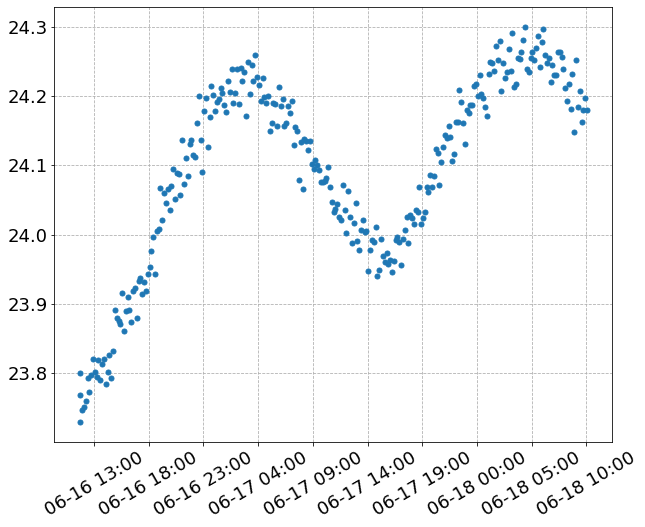

In [1328]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['Yoke (center magnet)'])

In [1329]:
.1 * 5e-5

5e-06

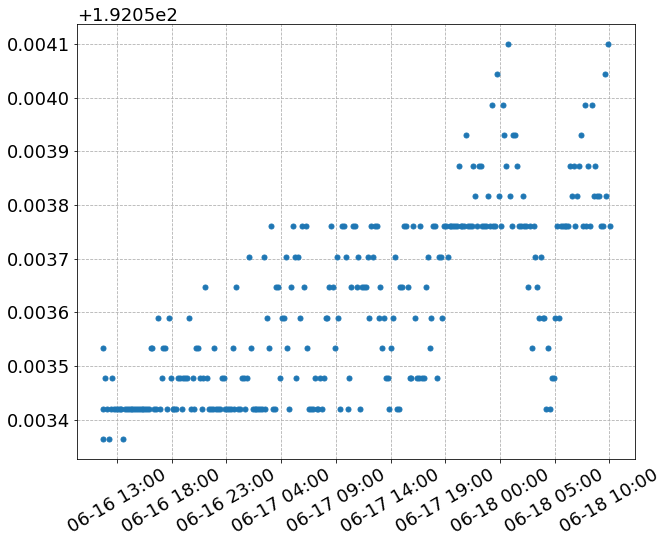

In [1330]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['Magnet Current [A]'])

In [1331]:
5e-3 * 7e-4

3.5e-06

In [1332]:
np.max([df_slow['Coil 1'], df_slow['Coil 2']])

44.3134537

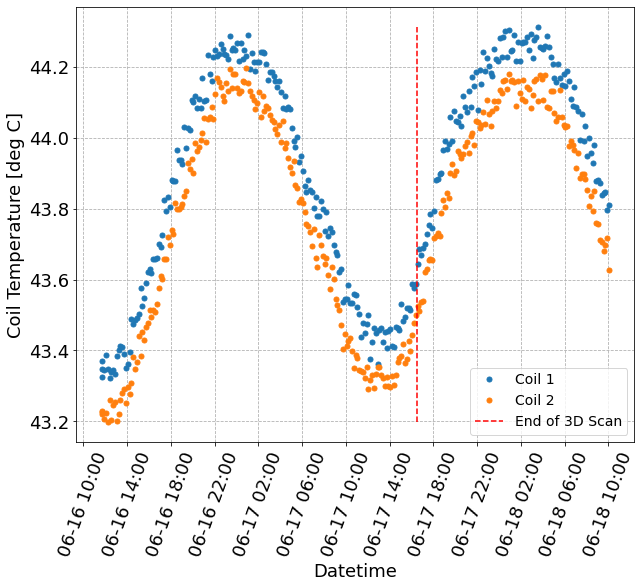

In [1333]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['Coil 1'], label='Coil 1', nmaj=10)
ax = datetime_plt(ax, df_slow.index, df_slow['Coil 2'], label='Coil 2', nmaj=10)
yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
tf = df_3d.index[-1]
# ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('Datetime')
ax.set_ylabel('Coil Temperature [deg C]');

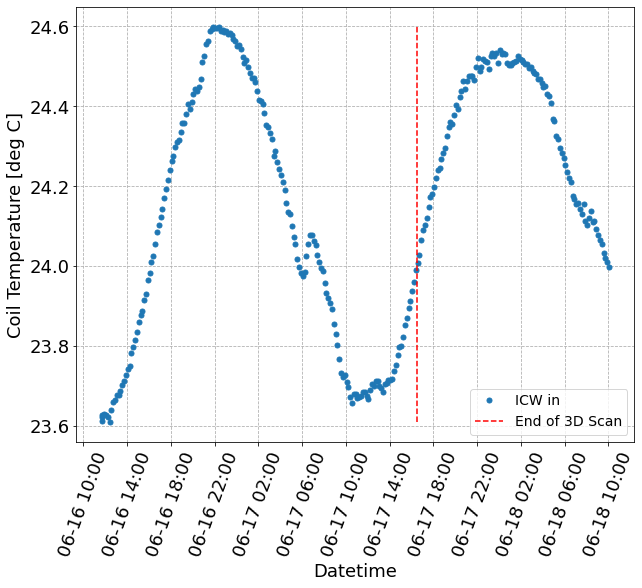

In [1424]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['ICW in'], label='ICW in', nmaj=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['Coil 2'], label='Coil 2', nmaj=10)
# yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
yma = np.max(df_slow['ICW in'])
ymi = np.min(df_slow['ICW in'])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])

tf = df_3d.index[-1]
# ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('Datetime')
ax.set_ylabel('Coil Temperature [deg C]');

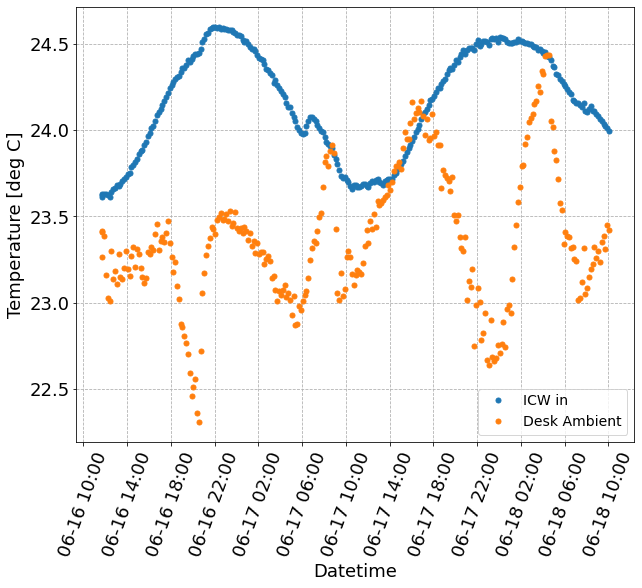

In [1413]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['ICW in'], label='ICW in', nmaj=10)
ax = datetime_plt(ax, df_slow.index, df_slow['Desk Ambient'], label='Desk Ambient', nmaj=10)
# yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
# tf = df_3d.index[-1]
# # ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
# ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('Datetime')
ax.set_ylabel('Temperature [deg C]');

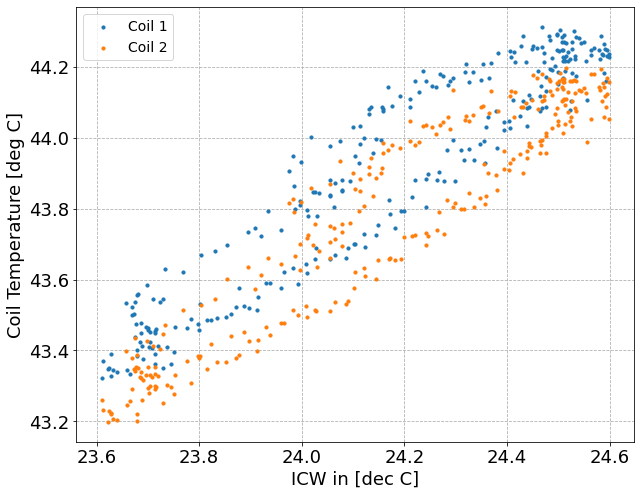

In [1420]:
fig, ax = plt.subplots()
ax.scatter(df_slow['ICW in'], df_slow['Coil 1'], label='Coil 1', s=10)
ax.scatter(df_slow['ICW in'], df_slow['Coil 2'], label='Coil 2', s=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['ICW in'], label='ICW in', nmaj=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['Desk Ambient'], label='Desk Ambient', nmaj=10)
# yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
# tf = df_3d.index[-1]
# # ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
# ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
#ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('ICW in [dec C]')
ax.set_ylabel('Coil Temperature [deg C]');

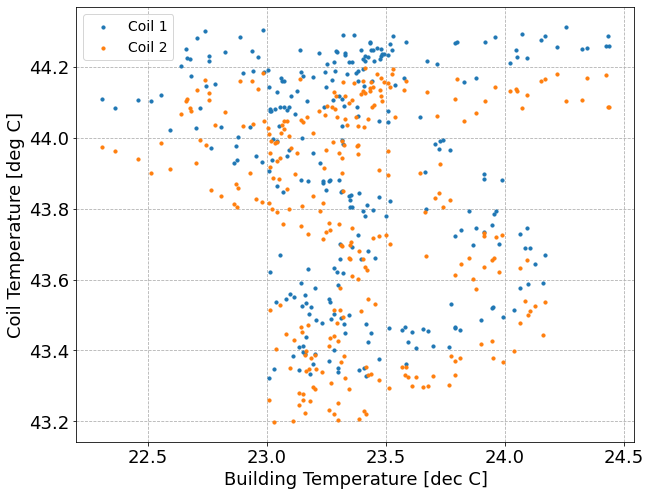

In [1421]:
fig, ax = plt.subplots()
ax.scatter(df_slow['Desk Ambient'], df_slow['Coil 1'], label='Coil 1', s=10)
ax.scatter(df_slow['Desk Ambient'], df_slow['Coil 2'], label='Coil 2', s=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['ICW in'], label='ICW in', nmaj=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['Desk Ambient'], label='Desk Ambient', nmaj=10)
# yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
# tf = df_3d.index[-1]
# # ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
# ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
#ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('Building Temperature [dec C]')
ax.set_ylabel('Coil Temperature [deg C]');

In [1334]:
tf

Timestamp('2021-06-17 16:29:59')

In [1335]:
df_slow['Magnet Current [A]']

Datetime
2021-06-16 11:41:47    192.053363
2021-06-16 11:42:27    192.053420
2021-06-16 11:42:59    192.053533
2021-06-16 11:53:55    192.053477
2021-06-16 12:03:55    192.053420
                          ...    
2021-06-18 09:23:47    192.053760
2021-06-18 09:33:47    192.054043
2021-06-18 09:43:47    192.053817
2021-06-18 09:53:47    192.054100
2021-06-18 10:03:47    192.053760
Name: Magnet Current [A], Length: 281, dtype: float64

In [1336]:
# WRONG COORDINATES

In [1337]:
#mag_mm_to_zaber_ADC(416169, 'Y')

In [1338]:
# zaber_ADC_to_mag_mm(416169, 'Y')

- This is wrong and needs to be fixed. Should look at carefully soon. Will want it working for presenting results.

In [1339]:
# TEST FROM NEW POSITION

In [1340]:
ADC_to_mm(416169, 'Y')

124.6

In [1341]:
ADC_to_mm(417000, 'Y'), ADC_to_mm(417250, 'Y')

(124.92460937499999, 125.02226562499999)

In [1342]:
ADC_to_mm(1649035, 'Z')

124.5

In [1343]:
ADC_to_mm(1648000, 'Z'), ADC_to_mm(1647500, 'Z')

(124.904296875, 125.099609375)

In [1344]:
ADC_to_mm(1650000, 'Z')

124.123046875

In [1345]:
mm_to_ADC(150, 'Z')

1583755.0

In [1346]:
mm_to_ADC(227, 'Z') # 3 mm below brass #2

1386635.0

In [1347]:
mm_to_ADC(53, 'Z') # 3 mm above brass # 1

1832075.0

- Z limits are off. Should inspect visually after next degauss.

In [1348]:
mm_to_ADC(51+spacer_R, 'Y')

NameError: name 'spacer_R' is not defined

In [1349]:
mm_to_ADC(226+spacer_R, 'Y')

NameError: name 'spacer_R' is not defined

In [1350]:
(700495-637825) * mm_per_ADC

24.48046875

- Y limits also off. Looks to be about the amount from NMR sample to bigger sharpie line. Measure this.

In [1351]:
mm_to_ADC(0, 'X')

394286.0

In [1352]:
mm_to_ADC(75, 'X')

586286.0

In [1353]:
mm_to_ADC(75, 'X') - mm_to_ADC(0, 'X')

192000.0

In [1354]:
# actual limits
(554838 - 422190)

132648

In [1355]:
(554838 - 422190) * mm_per_ADC

51.815625000000004

In [1356]:
(554838 - 422190) * mm_per_ADC + 12-2 + 2 + 10

73.81562500000001

In [1357]:
### Testing new columns

In [1358]:
len(df['magnet_X_mm'].unique())

51

# Plotting Functions

## Planes of NMR Data

In [1359]:
def scatter_plane(df, plane_str, plane_val, X, Y, plotfile=None):
    df_ = df.query(f'magnet_{plane_str}_mm == {plane_val}').copy()
    ADC = df_[f'Zaber_Meas_Encoder_{plane_str}'].iloc[0]
    # plot
    fig, ax = plt.subplots()
    sc = ax.scatter(df_[f'magnet_{X}_mm'], df_[f'magnet_{Y}_mm'], c=df_['NMR [T]'], s=25)
    cb = fig.colorbar(sc, label='NMR [T]')
    ax.set_xlabel(f'{X} [mm]')
    ax.set_ylabel(f'{Y} [mm]')
    fig.suptitle(f'{plane_str} = {plane_val:.2f} [mm] = {int(ADC)} [ADC]')
    
    if not plotfile is None:
        fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
        fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
    return fig, ax
    
#     xmin = df[f'Zaber_Meas_{mm}_X'].min()
#     df_ = df.query(f'`Zaber_Pattern_X` == {xval}').copy()
#     x_mm = df_[f'Zaber_Meas_{mm}_X'].values[0]
#     ymin = df_[f'Zaber_Meas_{mm}_Y'].min()
#     zmin = -df_[f'Zaber_Meas_{mm}_Z'].max()
#     # plot
#     fig, ax = plt.subplots()
#     sc = ax.scatter(1e-3*(df_[f'Zaber_Meas_{mm}_Y']-ymin), 1e-3*(-df_[f'Zaber_Meas_{mm}_Z']+zmin),
#                     c=df_['NMR [T]'], s=25)
#     cb = fig.colorbar(sc, label='NMR [T]')
#     ax.set_xlabel('Zaber Y [mm]')
#     ax.set_ylabel('Zaber Z [mm]')
#     fig.suptitle(f'Zaber X = {1e-3*(x_mm - xmin)} [mm] = {xval} [ADC]')
# #     fig.suptitle(f'Zaber Encoder X = {xval} [ADC]')
#     #ax.set_facecolor('white')
#     if not plotfile is None:
#         fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
#         fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
#     return fig, ax

In [1360]:
df_6_15['magnet_Z_mm'].unique()

array([129.5, 124.5])

In [1361]:
df_3d['magnet_Z_mm'].unique()

array([134.5, 132.5, 130.5, 128.5, 126.5, 124.5, 122.5, 120.5, 118.5,
       116.5, 114.5])

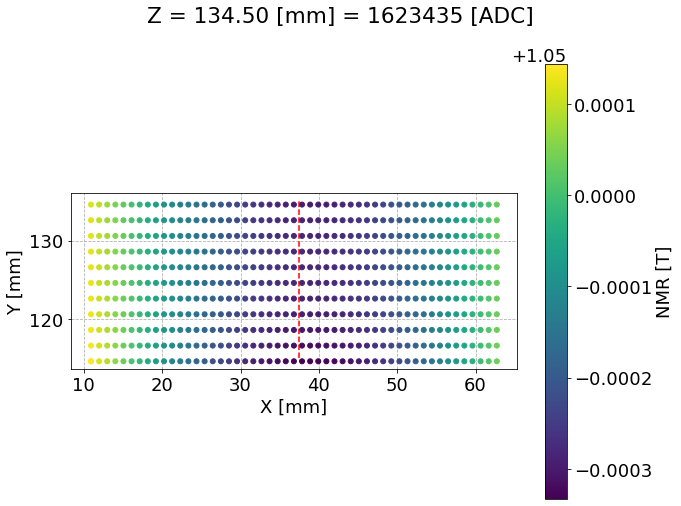

In [1363]:
# fig, ax = scatter_plane(df3d_, 'Z', 129.5, 'X', 'Y')
fig, ax = scatter_plane(df3d_, 'Z', 134.5, 'X', 'Y')
ax.plot([37.5, 37.5],[115, 135], 'r--')
ax.set_aspect('equal')

In [1364]:
df_3d['magnet_X_mm'].unique()

array([10.9      , 11.9359375, 12.971875 , 14.0078125, 15.04375  ,
       16.0796875, 17.115625 , 18.1515625, 19.1875   , 20.2234375,
       21.259375 , 22.2953125, 23.33125  , 24.3671875, 25.403125 ,
       26.4390625, 27.475    , 28.5109375, 29.546875 , 30.5828125,
       31.61875  , 32.6546875, 33.690625 , 34.7265625, 35.7625   ,
       36.7984375, 37.834375 , 38.8703125, 39.90625  , 40.9421875,
       41.978125 , 43.0140625, 44.05     , 45.0859375, 46.121875 ,
       47.1578125, 48.19375  , 49.2296875, 50.265625 , 51.3015625,
       52.3375   , 53.3734375, 54.409375 , 55.4453125, 56.48125  ,
       57.5171875, 58.553125 , 59.5890625, 60.625    , 61.6609375,
       62.696875 ])

In [1365]:
df_3d.magnet_Z_mm.unique()

array([134.5, 132.5, 130.5, 128.5, 126.5, 124.5, 122.5, 120.5, 118.5,
       116.5, 114.5])

In [1366]:
#df3d_2 = df3d_.query('(magnet_Z_mm == 129.50) & (magnet_X_mm < 37.5)').copy()
#df3d_2 = df3d_.query('(magnet_Z_mm == 129.50) & (magnet_X_mm < 54.0)').copy()
#df3d_2 = df3d_.query('(magnet_Z_mm == 129.50)').copy()
##df3d_2 = df3d_.query('(magnet_Z_mm == 134.5) & (magnet_X_mm < 16.0)').iloc[1:].copy()
###df3d_2 = df3d_.query('(magnet_Z_mm == 134.5) & (10.9 < magnet_X_mm < 60.0)').copy()
##df3d_2 = df3d_.query('(magnet_Z_mm == 124.5) & (10.9 < magnet_X_mm < 60.0)').copy()
# df3d_2 = df3d_.query('(magnet_Z_mm == 125.5)').copy()
df3d_2 = df3d_.query('(magnet_Z_mm == 124.5)').copy()

In [1367]:
df3d_2

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:44:59  6/16/2021 11:44:59 AM          192.053420   
2021-06-16 11:47:41  6/16/2021 11:47:41 AM          192.053420   
2021-06-16 11:50:29  6/16/2021 11:50:29 AM          192.053420   
2021-06-16 11:53:22  6/16/2021 11:53:22 AM          192.053420   
2021-06-16 11:56:49  6/16/2021 11:56:49 AM          192.053420   
...                                    ...                 ...   
2021-06-17 16:16:31   6/17/2021 4:16:31 PM          192.053647   
2021-06-17 16:19:27   6/17/2021 4:19:27 PM          192.053590   
2021-06-17 16:22:22   6/17/2021 4:22:22 PM          192.053420   
2021-06-17 16:25:49   6/17/2021 4:25:49 PM          192.053477   
2021-06-17 16:28:42   6/17/2021 4:28:42 PM          192.053703   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:44:59           24.302533  1.050127        0.0         422190.0   
2021-06-16 11:47:41           24.302750  1.050123        0.0         422190.0   
2021-06-16 11:50:29           24.302033  1.050120        0.0         422190.0   
2021-06-16 11:53:22           24.302067  1.050118        0.0         422190.0   
2021-06-16 11:56:49           24.302367  1.050117        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:16:31           24.327967  1.050036        0.0         554790.0   
2021-06-17 16:19:27           24.328933  1.050035        0.0         554790.0   
2021-06-17 16:22:22           24.329017  1.050032        0.0         554790.0   
2021-06-17 16:25:49           24.329133  1.050031        0.0         554790.0   
2021-06-17 16:28:42           24.329750  1.050030        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:44:59         390569.0        1649035.0              422190.0   
2021-06-16 11:47:41         395689.0        1649035.0              422190.0   
2021-06-16 11:50:29         400809.0        1649035.0              422190.0   
2021-06-16 11:53:22         405929.0        1649035.0              422190.0   
2021-06-16 11:56:49         411049.0        1649035.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:16:31         421289.0        1649035.0              554790.0   
2021-06-17 16:19:27         426409.0        1649035.0              554790.0   
2021-06-17 16:22:22         431529.0        1649035.0              554790.0   
2021-06-17 16:25:49         436649.0        1649035.0              554790.0   
2021-06-17 16:28:42         441769.0        1649035.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:44:59         164917.96875              390569.0   
2021-06-16 11:47:41         164917.96875              395689.0   
2021-06-16 11:50:29         164917.96875              400809.0   
2021-06-16 11:53:22         164917.96875              405929.0   
2021-06-16 11:56:49         164917.96875              411049.0   
...                                  ...                   ...   
2021-06-17 16:16:31         216714.84375              421289.0   
2021-06-17 16:19:27         216714.84375              426409.0   
2021-06-17 16:22:22         216714.84375              431529.0   
2021-06-17 16:25:49         216714.84375              436649.0   
2021-06-17 16:28:42         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:44:59        152566.015625             1649035.0   
2021-06-16 11:47:41        154566.015625

In [1368]:
len(df3d_), len(df3d_2)

(6172, 561)

In [1369]:
len(df3d_2.magnet_X_mm.unique()), len(df3d_2.magnet_Y_mm.unique())

(51, 11)

In [1370]:
len(df3d_2.magnet_X_mm.unique()) * len(df3d_2.magnet_Y_mm.unique())

561

In [1371]:
fig = mu2e_plot3d(df3d_2, 'magnet_X_mm', 'magnet_Y_mm', 'NMR [T]', "`NMR [T]` > 0.", mode='plotly')

/home/ckampa/anaconda3/envs/mu2e/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:173: DeprecationWarning:

plotly.graph_objs.ColorBar is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.marker.ColorBar
  - plotly.graph_objs.surface.ColorBar
  - etc.




In [1372]:
df_3d['magnet_X_mm'].min(), df_3d['magnet_X_mm'].max()

(10.9, 62.696875)

In [1373]:
df_3d['magnet_X_mm'].max() - df_3d['magnet_X_mm'].min()

51.796875

In [1374]:
fig.show()

In [1375]:
df3d_

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-17 16:28:57   6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13   6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28   6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43   6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59   6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:41:51         164917.96875              390569.0   
2021-06-16 11:43:46         164917.96875              390569.0   
2021-06-16 11:44:01         164917.96875              390569.0   
2021-06-16 11:44:15         164917.96875              390569.0   
2021-06-16 11:44:30         164917.96875              390569.0   
...                                  ...                   ...   
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:51        152566.015625             1623435.0   
2021-06-16 11:43:46        152566.015625

In [1376]:
# checking yaw and roll corrections

In [1377]:
phi = -0.0886 # yaw
theta = 0.0957 # roll
x0 = 10.1 # distance from pole 1

In [1378]:
df3d_['magnet_Y_prime_mm'] = df3d_['magnet_Y_mm'] + (df3d_['magnet_X_mm']-x0) * phi
df3d_['magnet_Z_prime_mm'] = df3d_['magnet_Z_mm'] + (df3d_['magnet_X_mm']-x0) * theta

In [1379]:
df3d_.magnet_X_mm.unique()

array([10.9      , 11.9359375, 12.971875 , 14.0078125, 15.04375  ,
       16.0796875, 17.115625 , 18.1515625, 19.1875   , 20.2234375,
       21.259375 , 22.2953125, 23.33125  , 24.3671875, 25.403125 ,
       26.4390625, 27.475    , 28.5109375, 29.546875 , 30.5828125,
       31.61875  , 32.6546875, 33.690625 , 34.7265625, 35.7625   ,
       36.7984375, 37.834375 , 38.8703125, 39.90625  , 40.9421875,
       41.978125 , 43.0140625, 44.05     , 45.0859375, 46.121875 ,
       47.1578125, 48.19375  , 49.2296875, 50.265625 , 51.3015625,
       52.3375   , 53.3734375, 54.409375 , 55.4453125, 56.48125  ,
       57.5171875, 58.553125 , 59.5890625, 60.625    , 61.6609375,
       62.696875 ])

BEFORE CORRECTION
AFTER CORRECTION


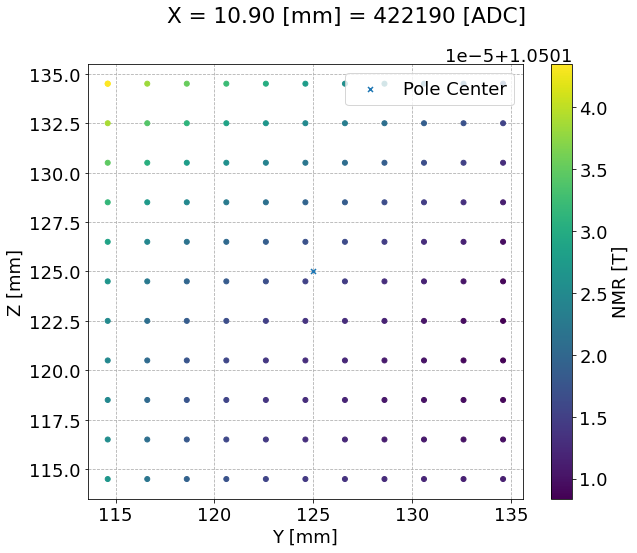

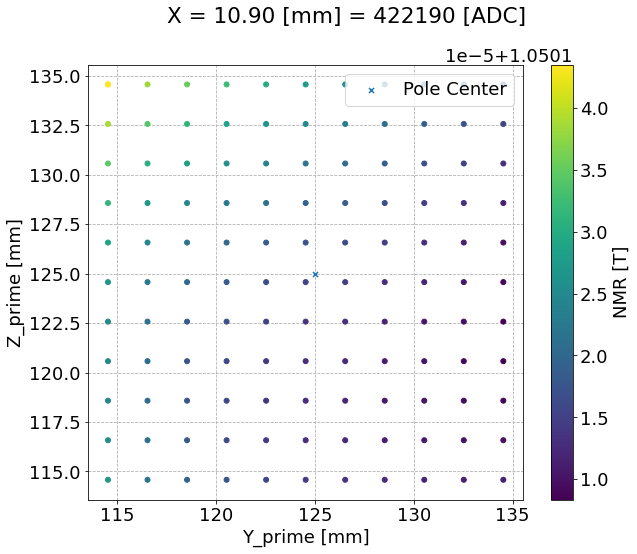

In [1096]:
# x = 10.9 -- no correction
print('BEFORE CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 10.9, 'Y', 'Z' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

print('AFTER CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 10.9, 'Y_prime', 'Z_prime' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

BEFORE CORRECTION
AFTER CORRECTION


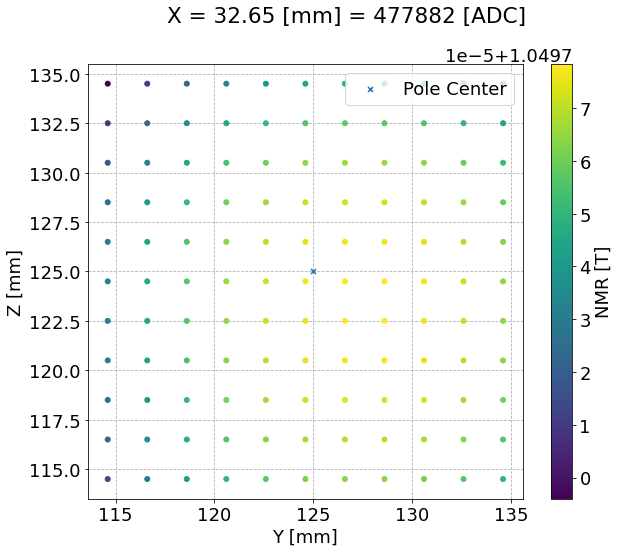

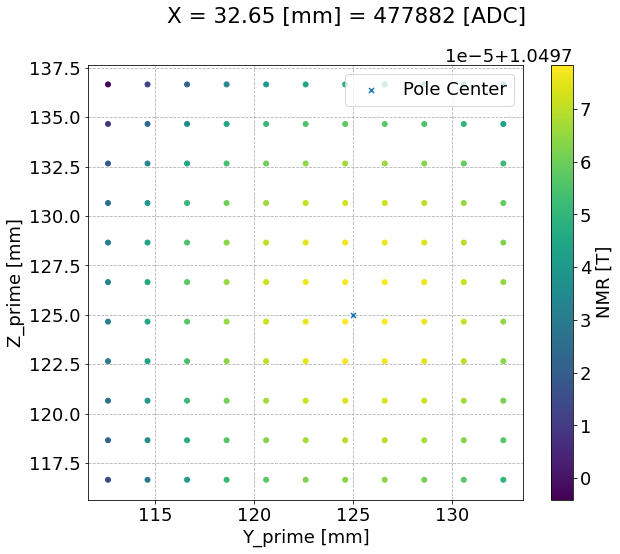

In [1097]:
# x = 32.6546875 -- correction from measurement point
print('BEFORE CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 32.6546875, 'Y', 'Z' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

print('AFTER CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 32.6546875, 'Y_prime', 'Z_prime' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

BEFORE CORRECTION
AFTER CORRECTION


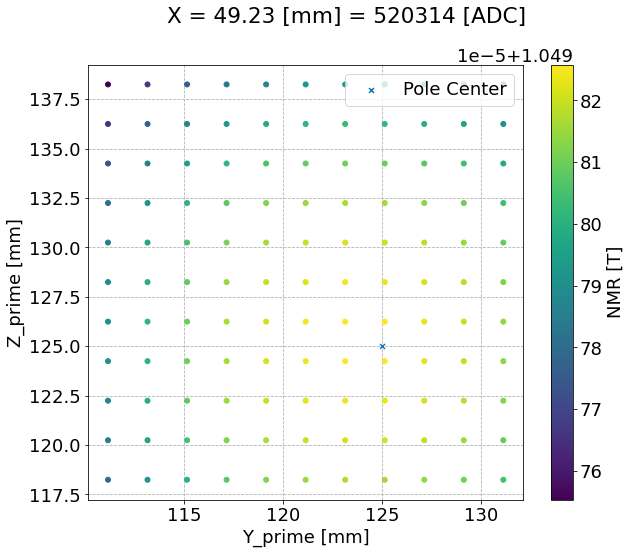

In [1098]:
# x = 49.2296875 -- correction from measurement point
print('BEFORE CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 49.2296875, 'Y', 'Z' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

print('AFTER CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 49.2296875, 'Y_prime', 'Z_prime' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

BEFORE CORRECTION
AFTER CORRECTION


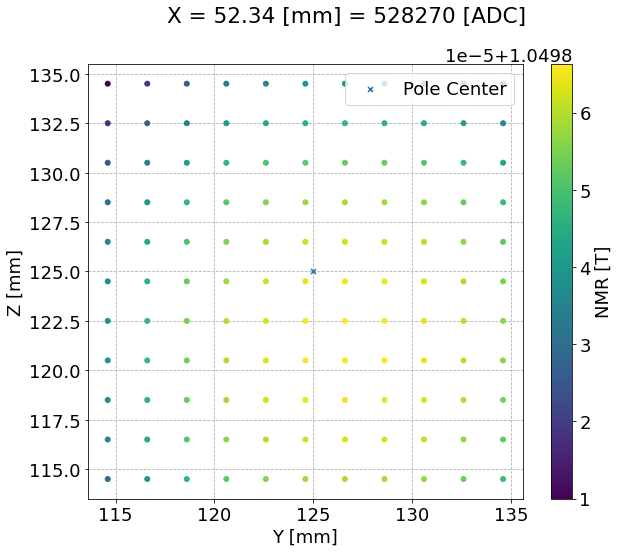

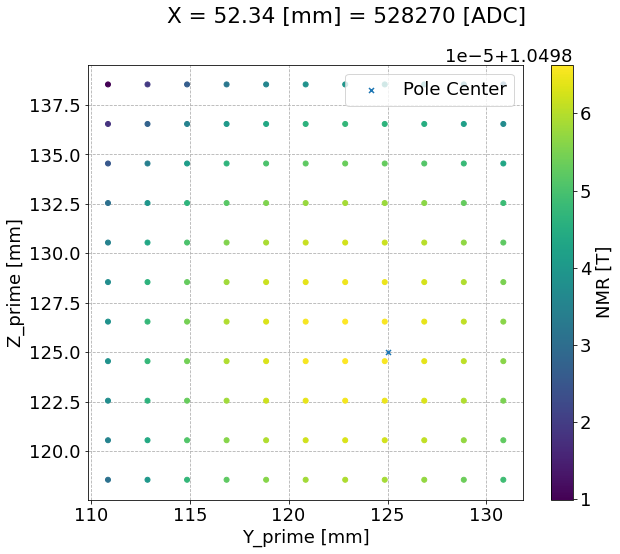

In [1099]:
# x = 52.696875 -- correction from measurement point
print('BEFORE CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 52.3375, 'Y', 'Z' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

print('AFTER CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 52.3375, 'Y_prime', 'Z_prime' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

In [650]:
df3d_

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-16 13:37:56   6/16/2021 1:37:56 PM          192.053420   
2021-06-16 13:38:12   6/16/2021 1:38:12 PM          192.053477   
2021-06-16 13:38:27   6/16/2021 1:38:27 PM          192.053420   
2021-06-16 13:38:42   6/16/2021 1:38:42 PM          192.053420   
2021-06-16 13:38:58   6/16/2021 1:38:58 PM          192.053477   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-16 13:37:56           24.307633  1.050056        0.0         430146.0   
2021-06-16 13:38:12           24.307750  1.050055        0.0         430146.0   
2021-06-16 13:38:27           24.307800  1.050055        0.0         430146.0   
2021-06-16 13:38:42           24.307817  1.050054        0.0         430146.0   
2021-06-16 13:38:58           24.307867  1.050053        0.0         430146.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-16 13:37:56         411049.0        1649035.0              430146.0   
2021-06-16 13:38:12         411049.0        1654155.0              430146.0   
2021-06-16 13:38:27         411049.0        1659275.0              430146.0   
2021-06-16 13:38:42         411049.0        1664395.0              430146.0   
2021-06-16 13:38:58         411049.0        1669515.0              430146.0   

                     Zaber_Meas_Micron_X  ...  Zaber_Meas_Encoder_Z  \
Datetime                                  ...                         
2021-06-16 11:41:51         164917.96875  ...             1623435.0   
2021-06-16 11:43:46         164917.96875  ...             1623435.0   
2021-06-16 11:44:01         164917.96875  ...             1628555.0   
2021-06-16 11:44:15         164917.96875  ...             1633675.0   
2021-06-16 11:44:30         164917.96875  ...             1638795.0   
...                                  ...  ...                   ...   
2021-06-16 13:37:56         168025.78125  ...             1649035.0   
2021-06-16 13:38:12         168025.78125  ...             1654155.0   
2021-06-16 13:38:27         168025.78125  ...             1659275.0   
2021-06-16 13:38:42         168025.78125  ...             1664395.0   
2021-06-16 13:38:58         168025.78125  ...             1669515.0   

                     Zaber_Meas_Micron_Z  seconds_delta  hours_delta  \
Datetime                                                               
2021-06-16 11:41:51        63

<ipython-input-981-e34682e5b772>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



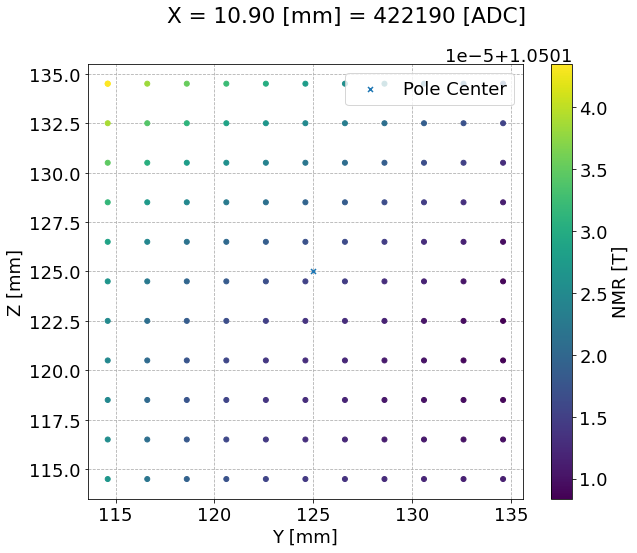

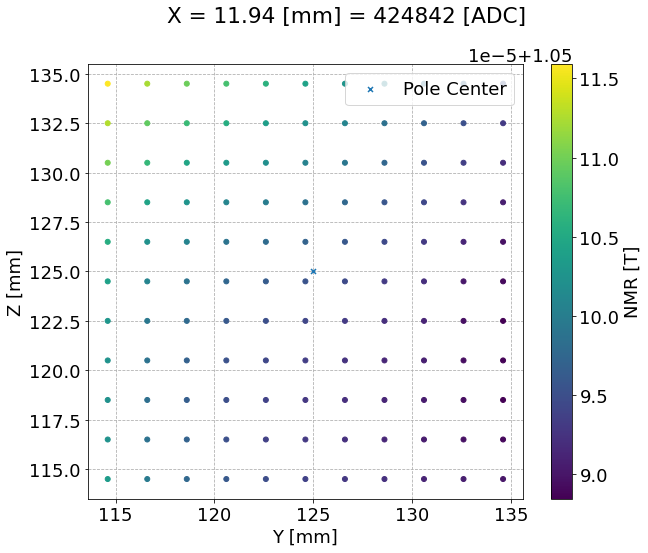

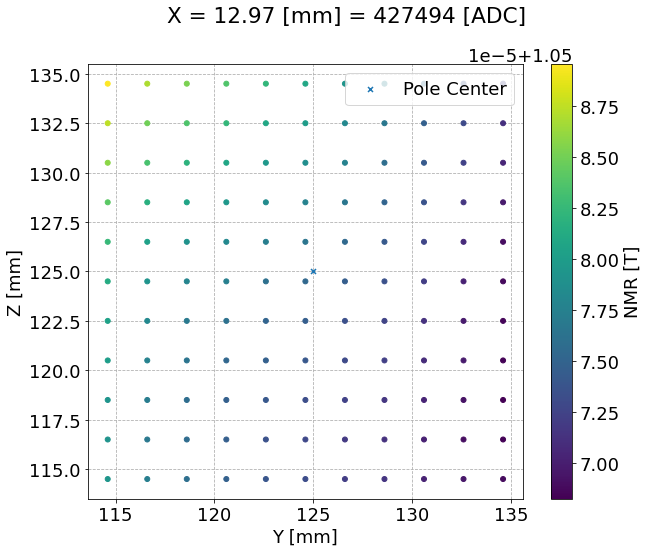

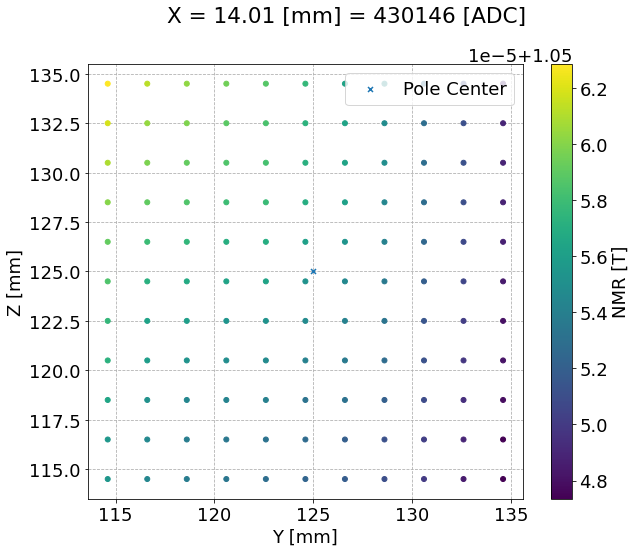

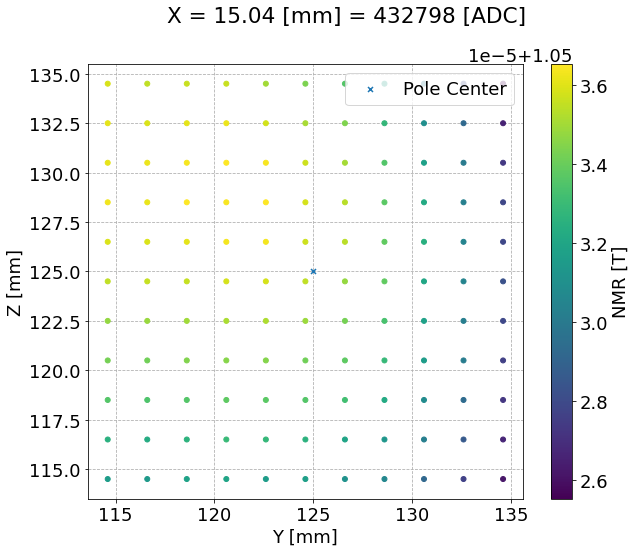

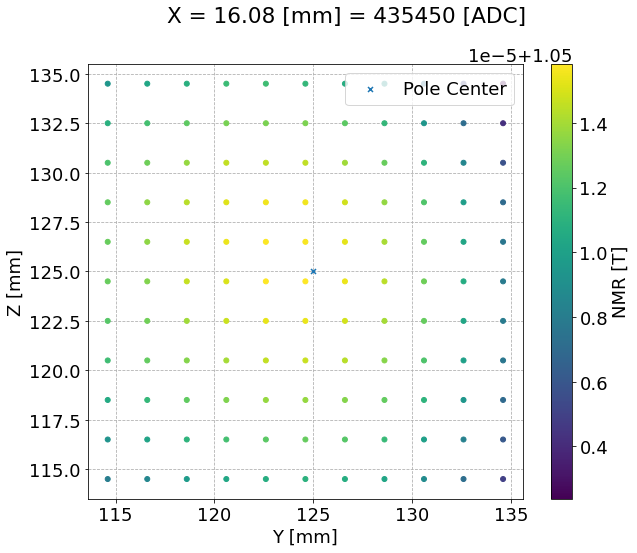

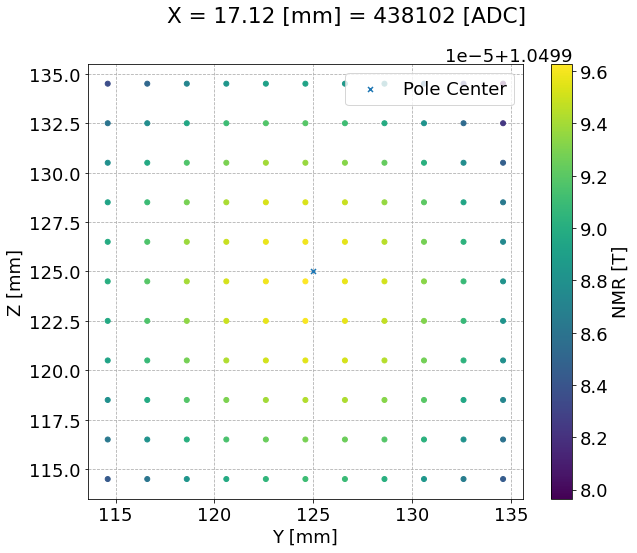

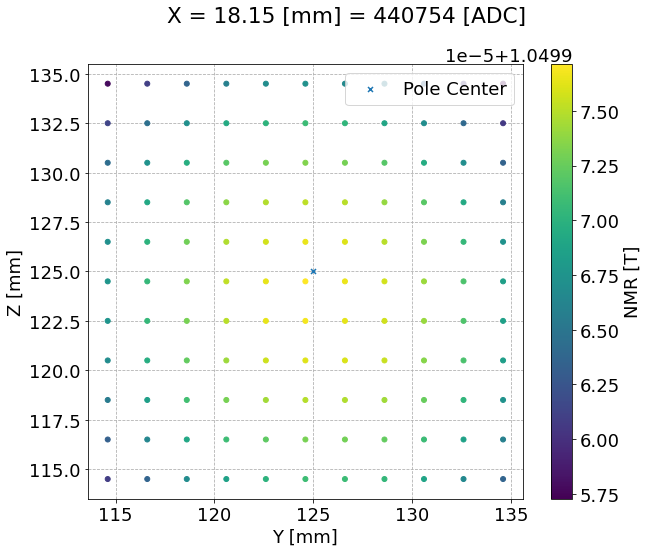

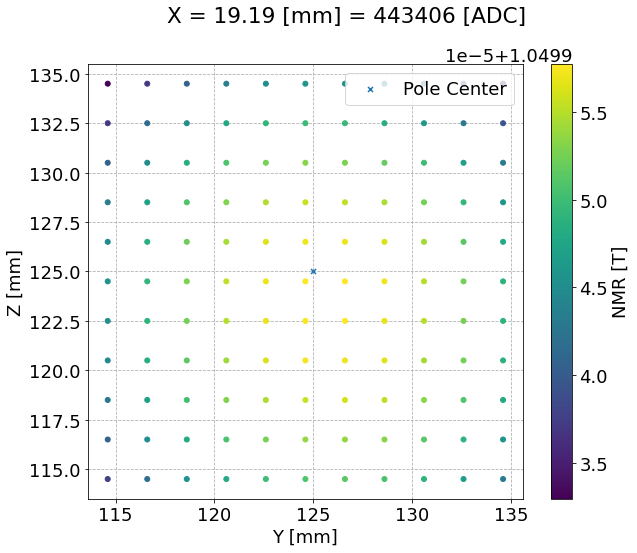

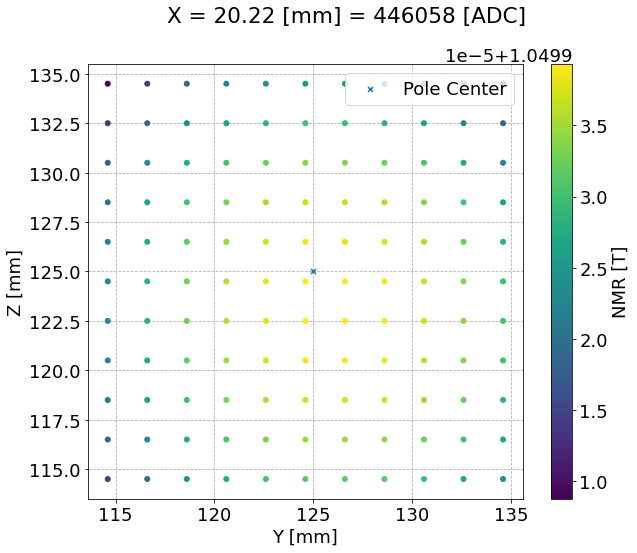

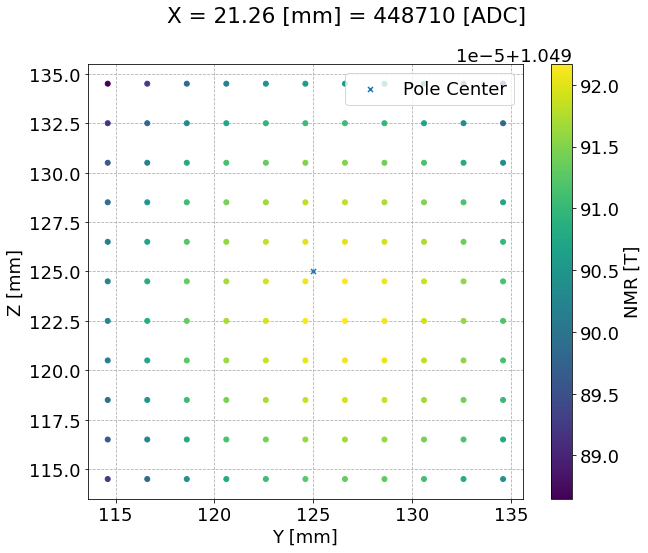

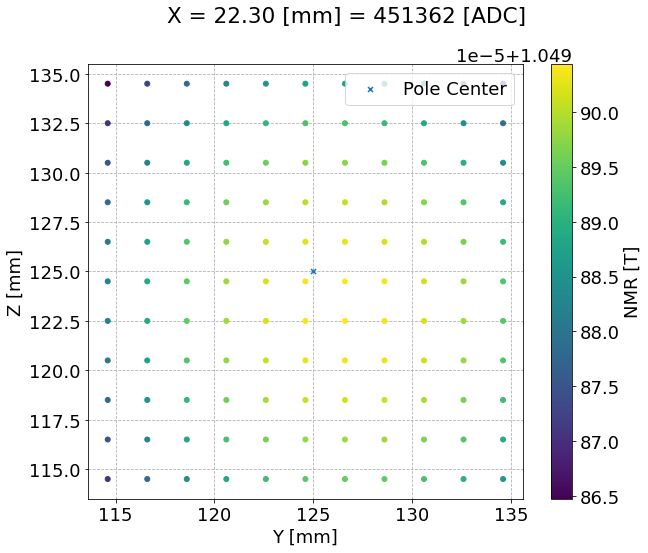

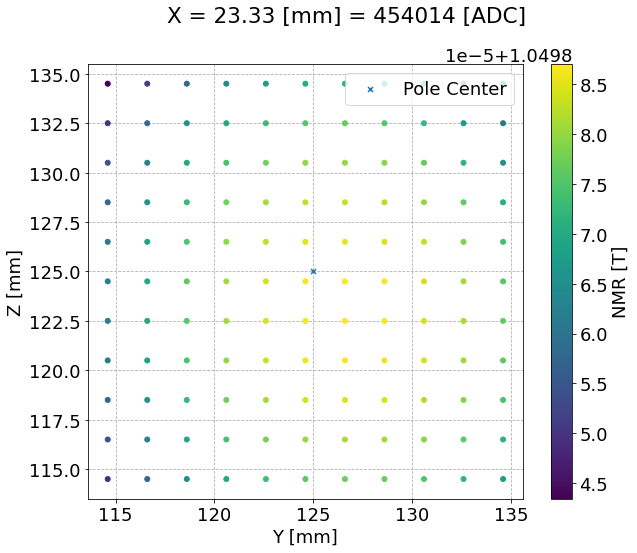

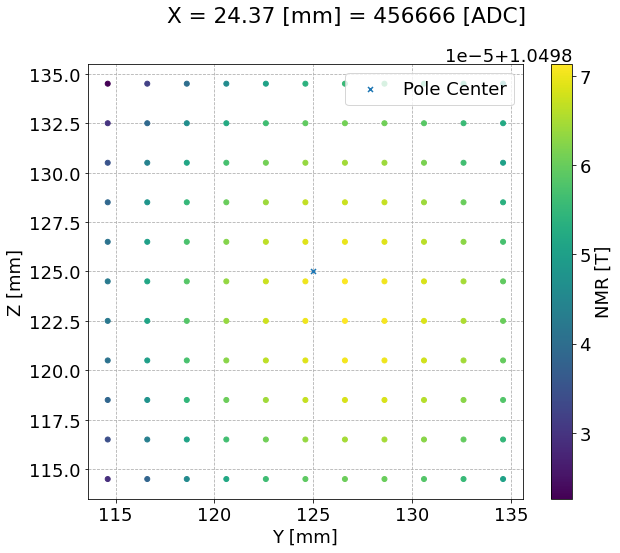

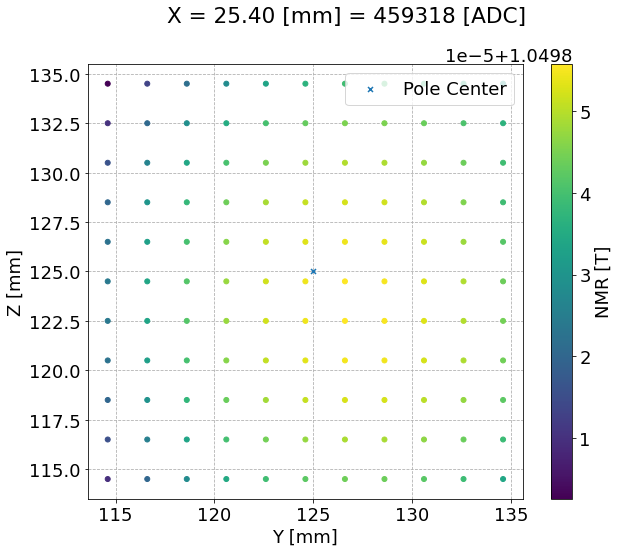

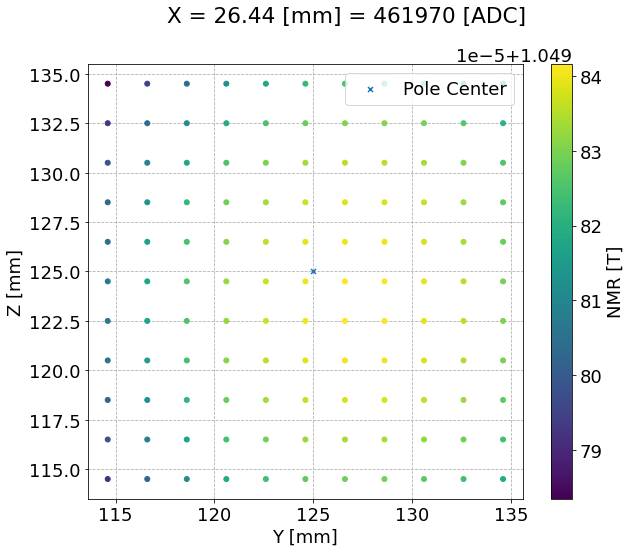

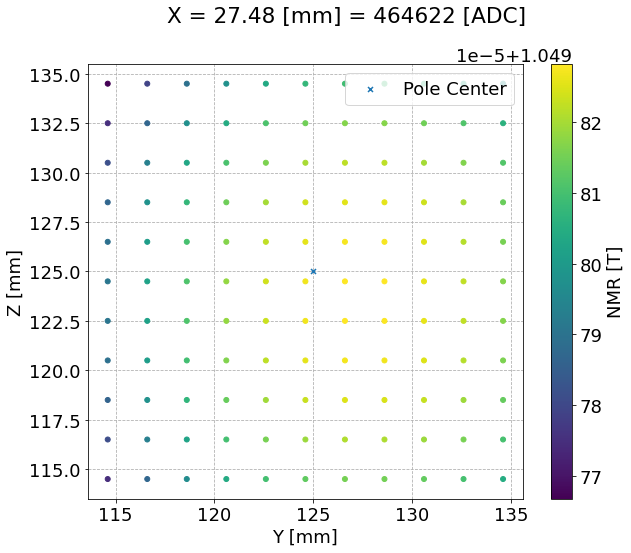

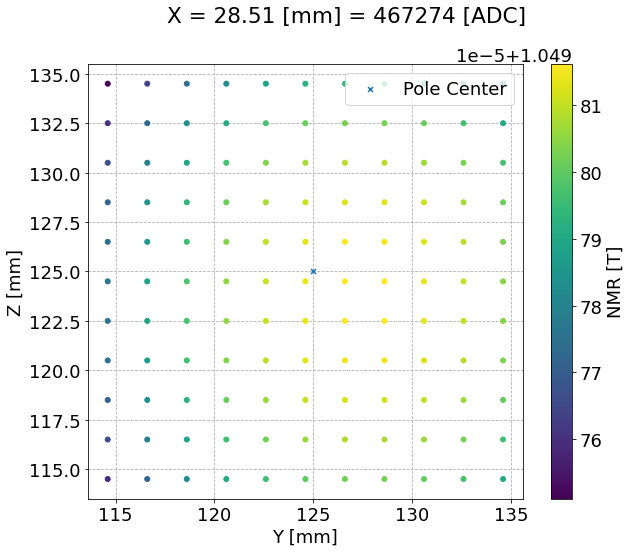

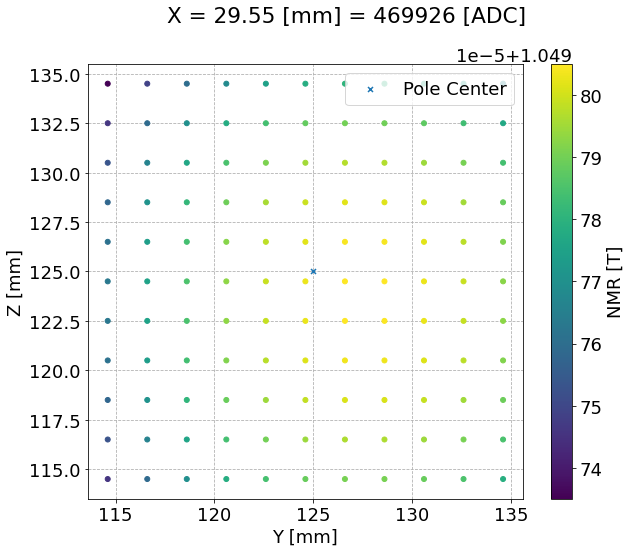

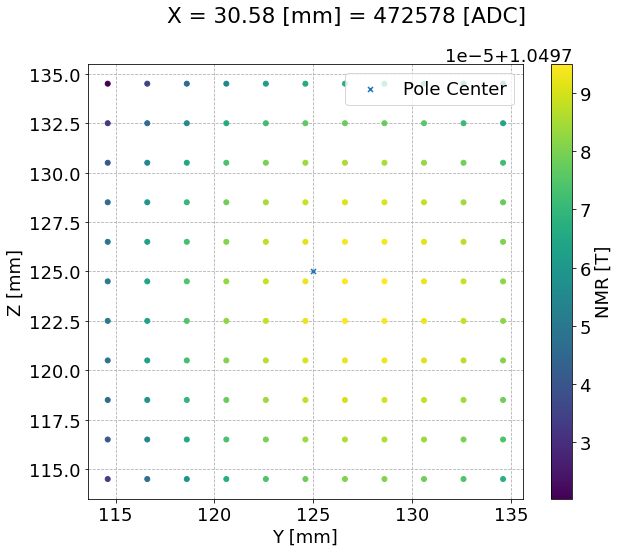

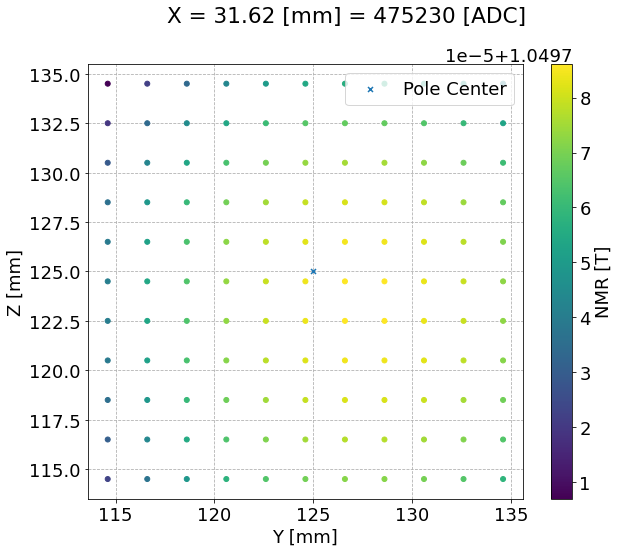

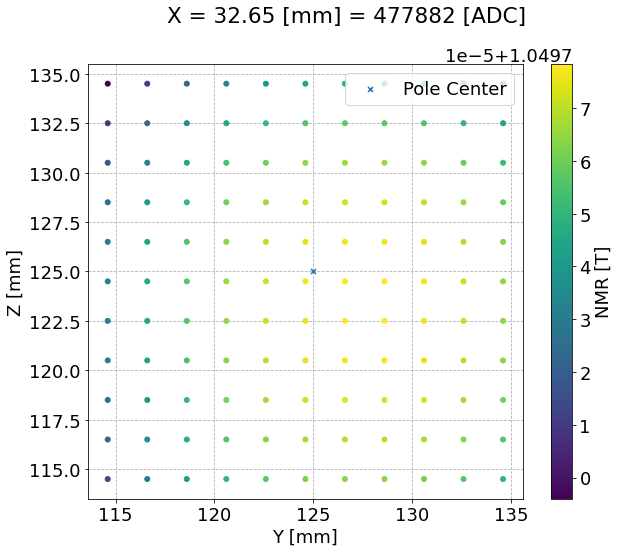

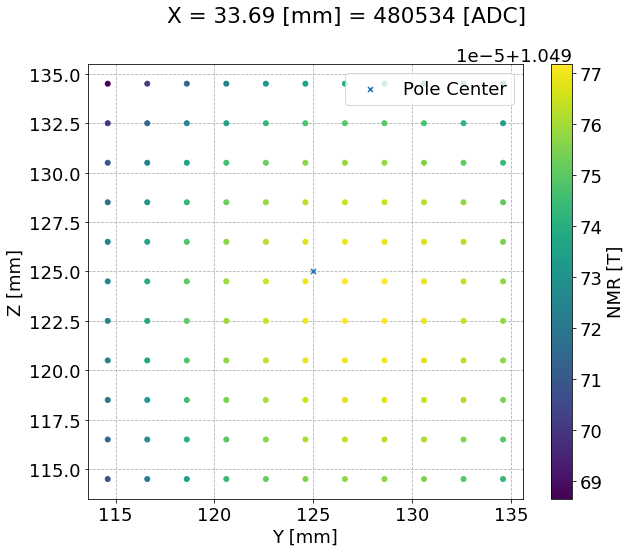

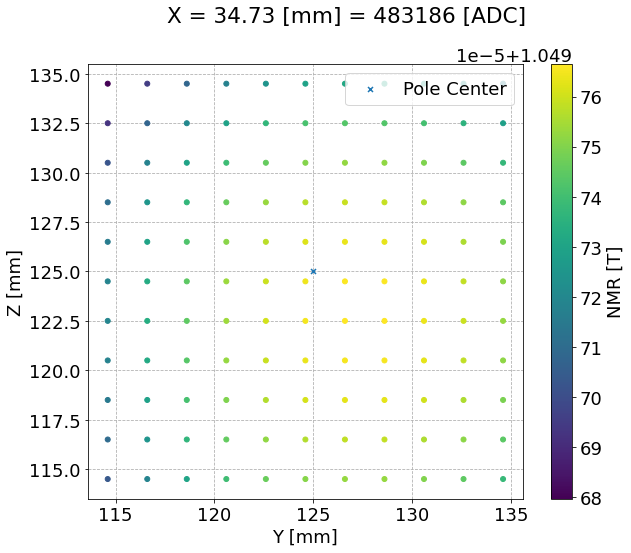

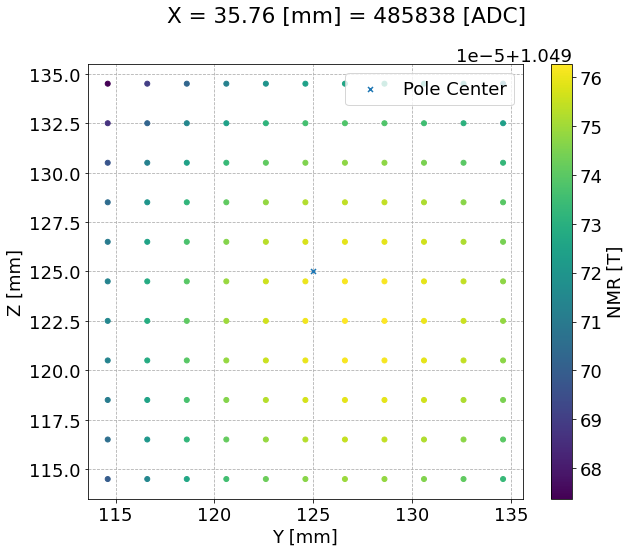

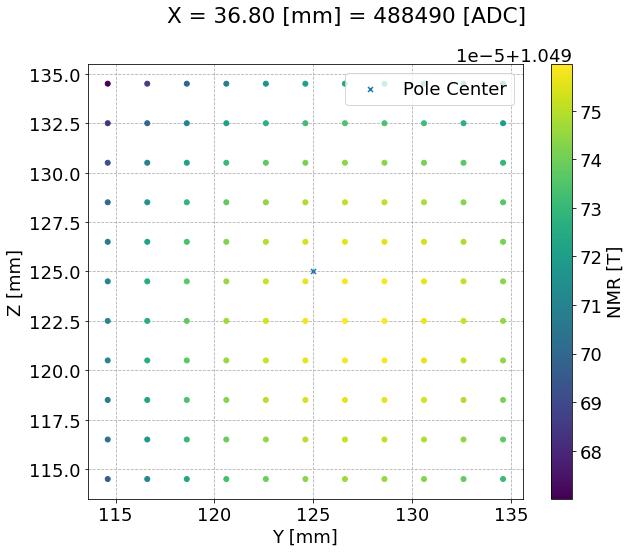

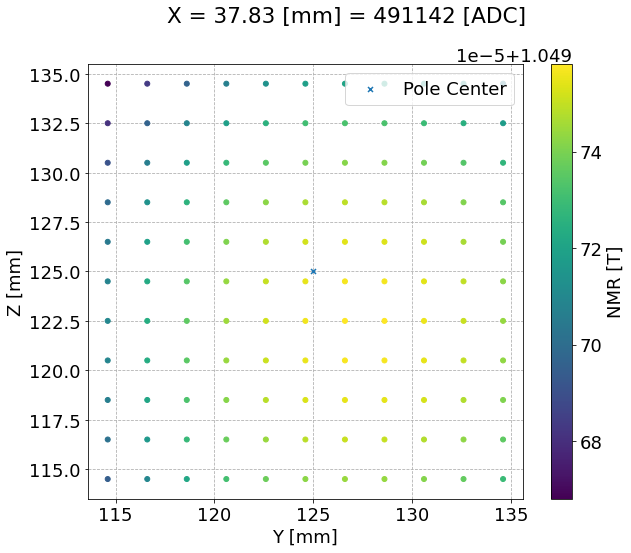

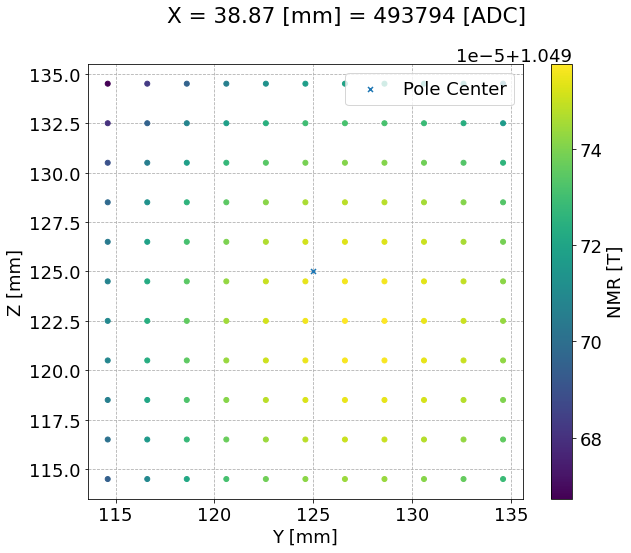

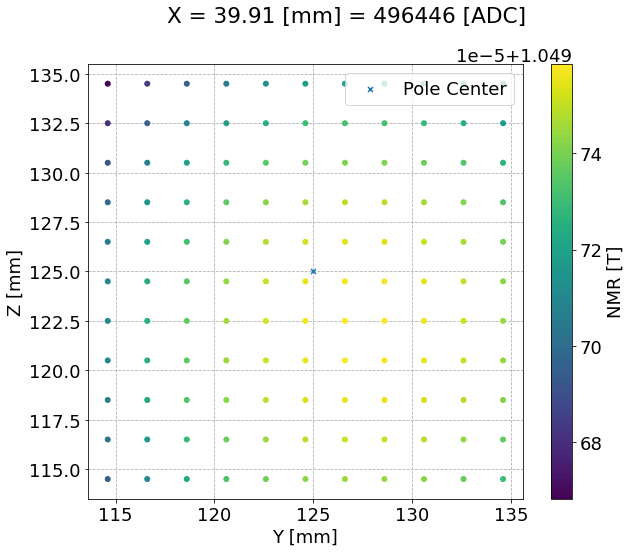

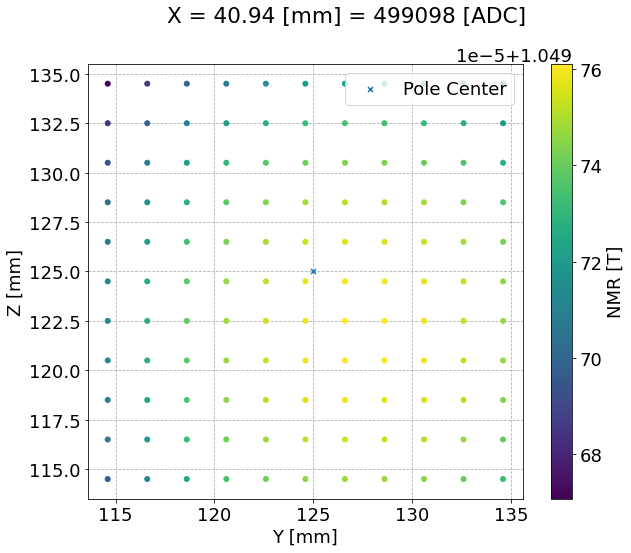

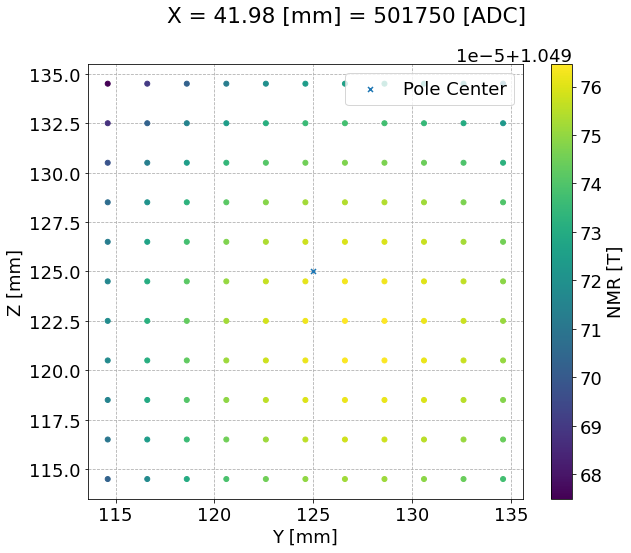

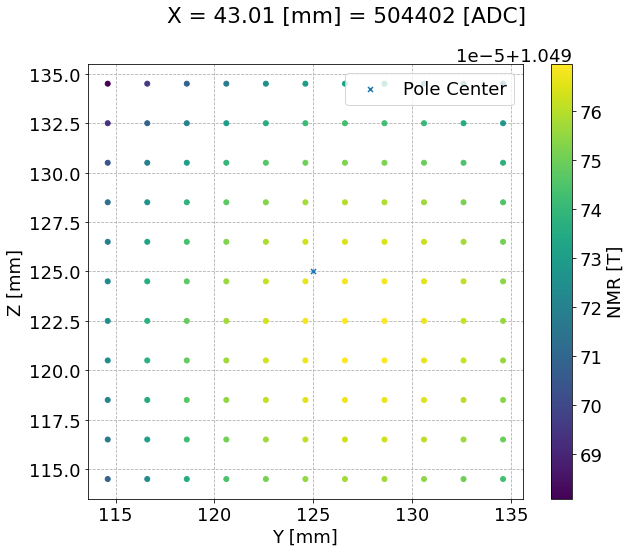

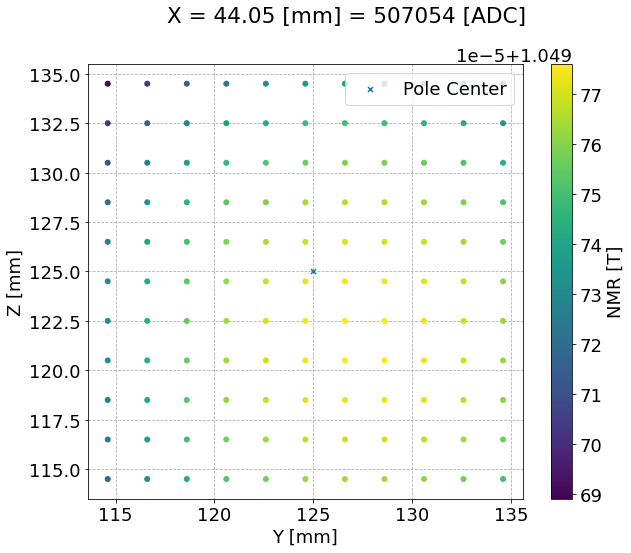

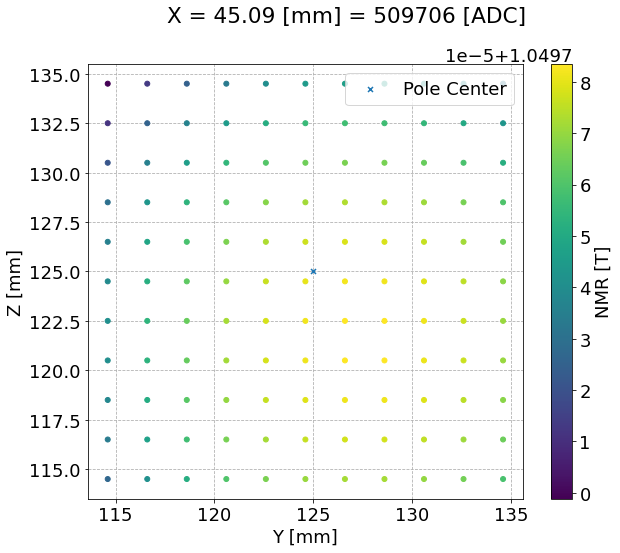

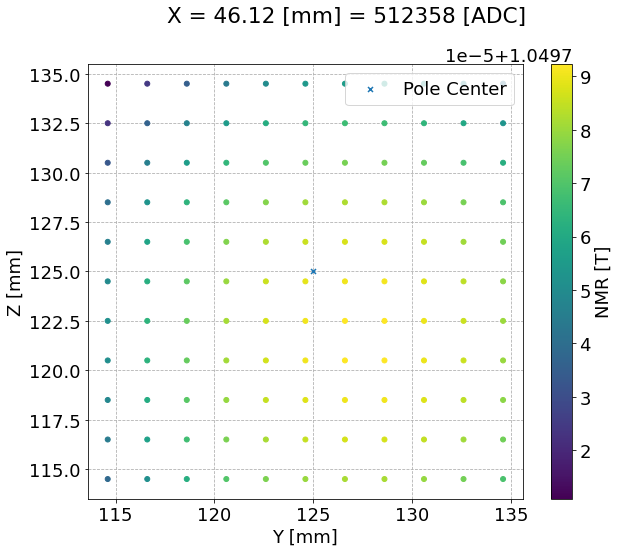

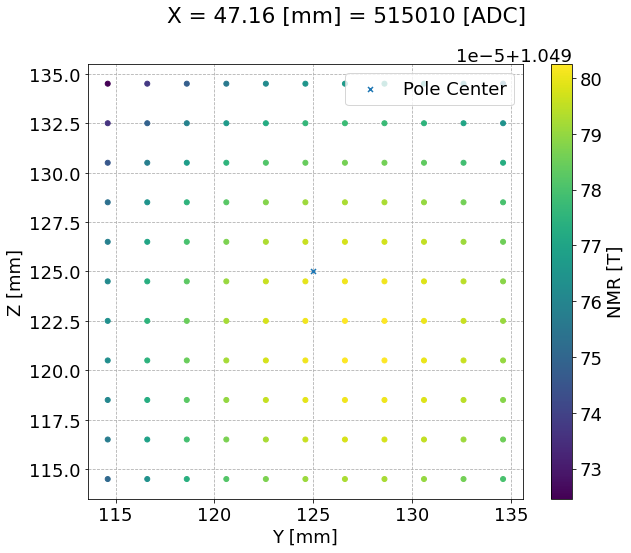

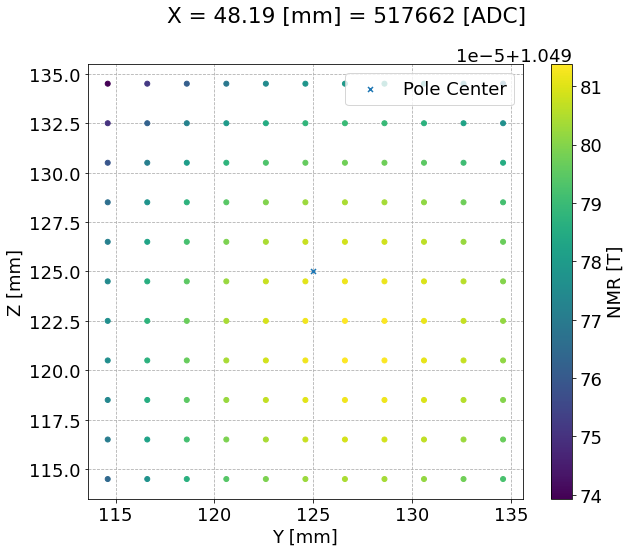

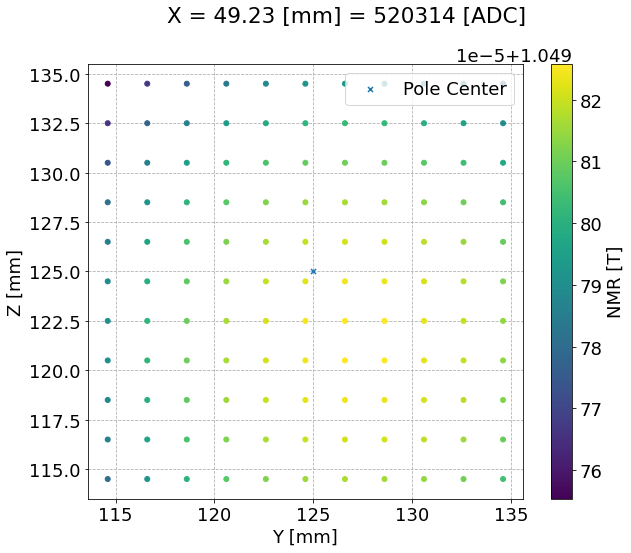

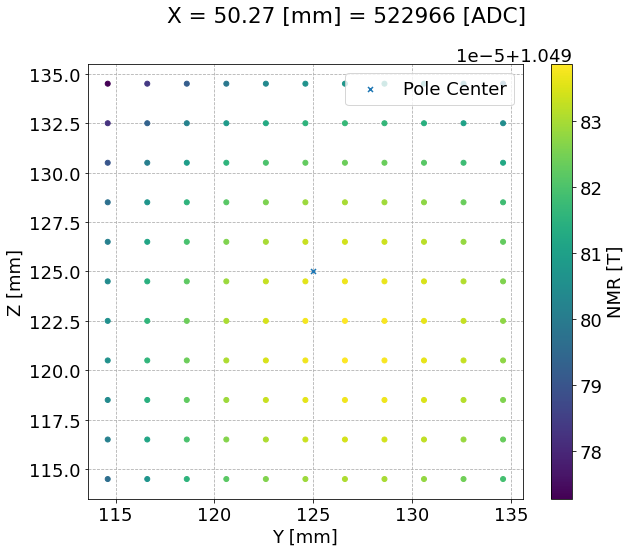

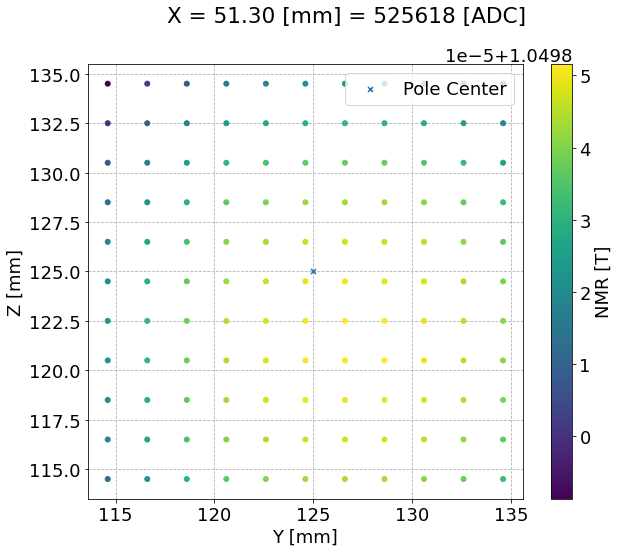

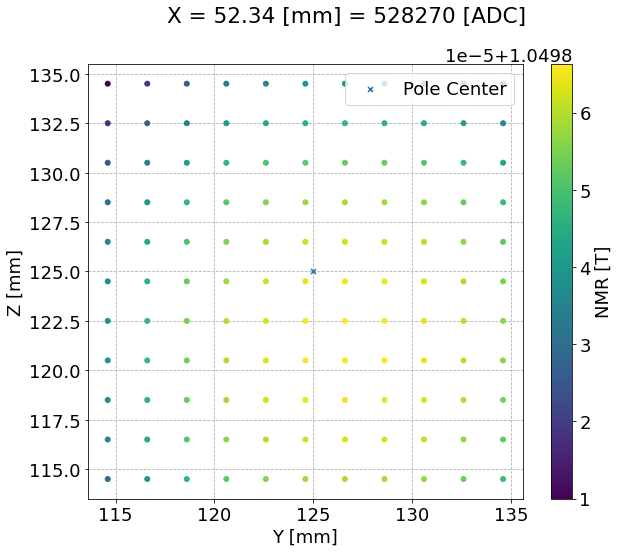

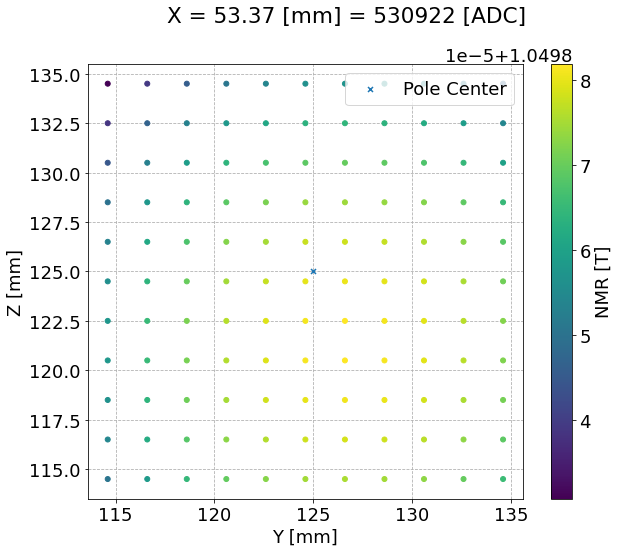

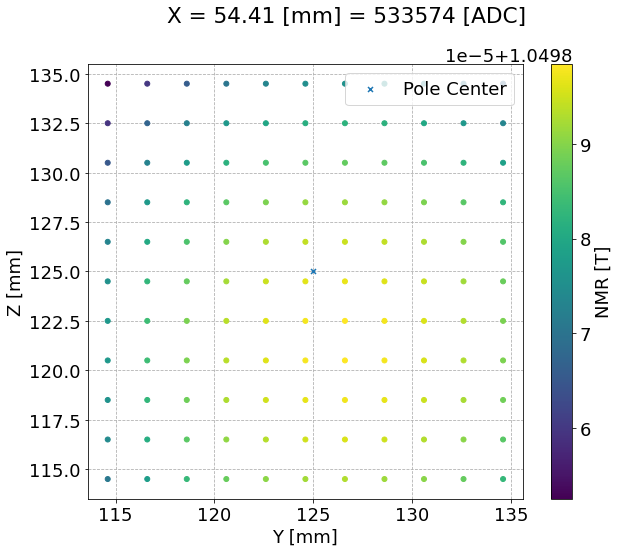

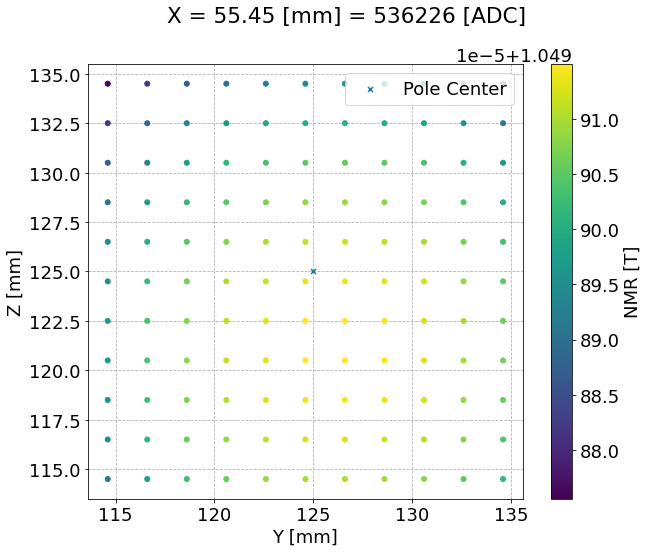

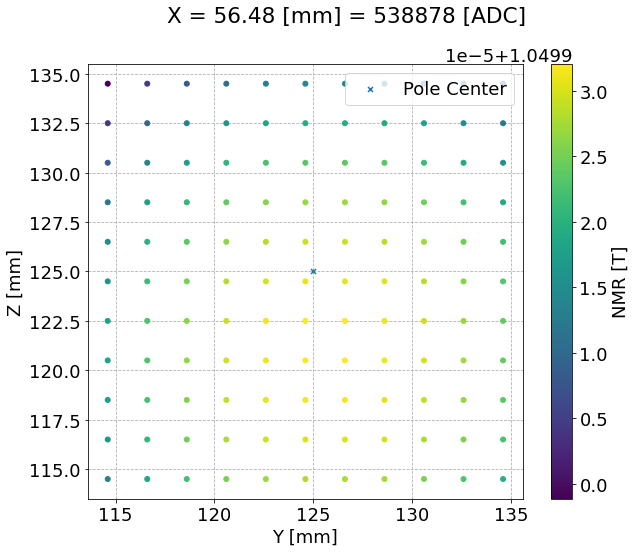

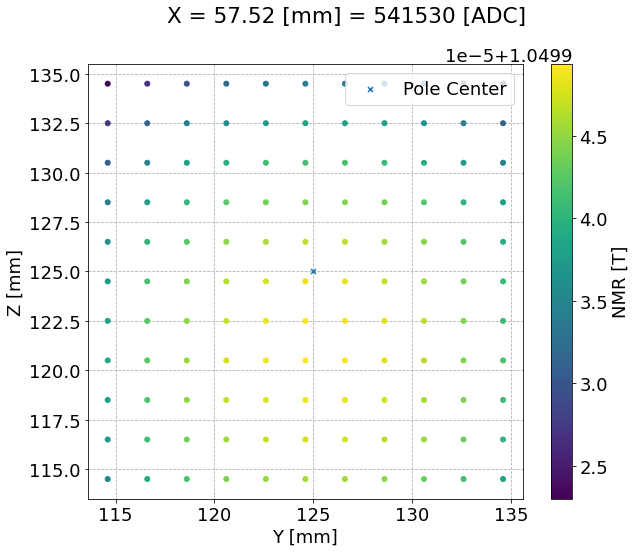

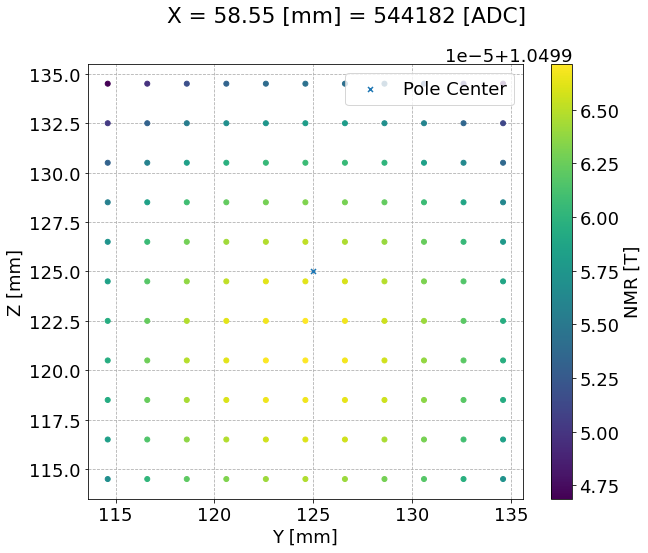

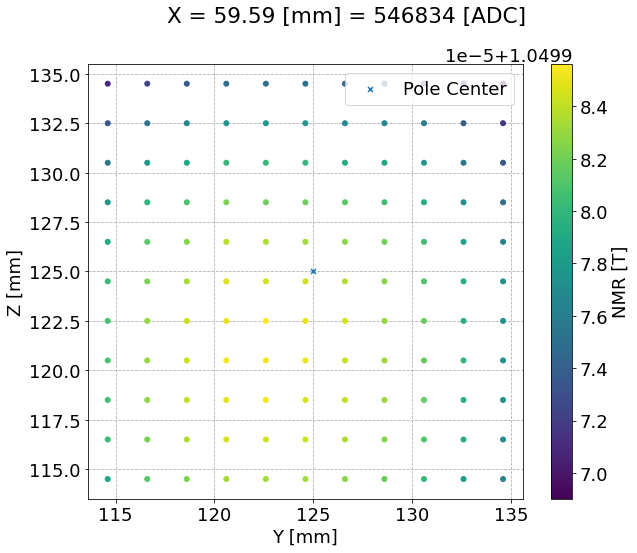

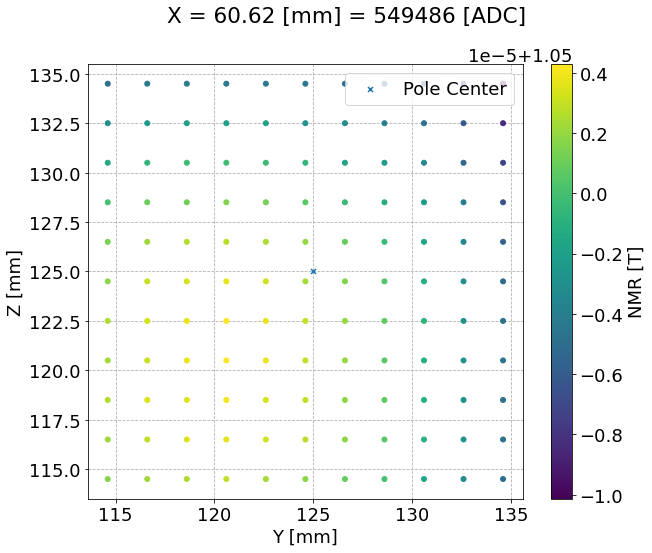

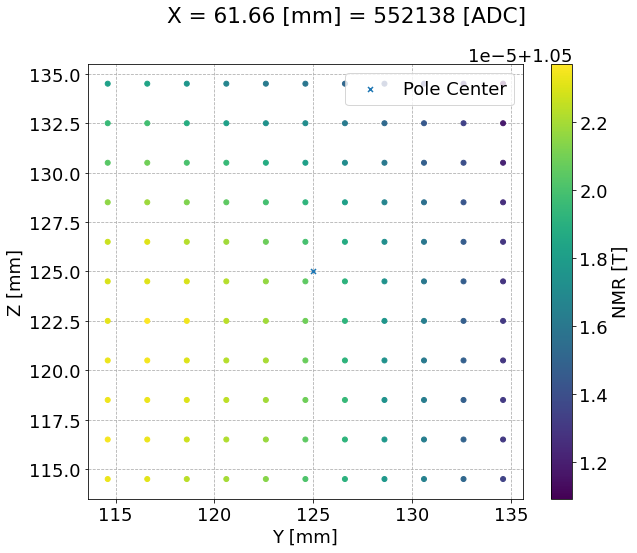

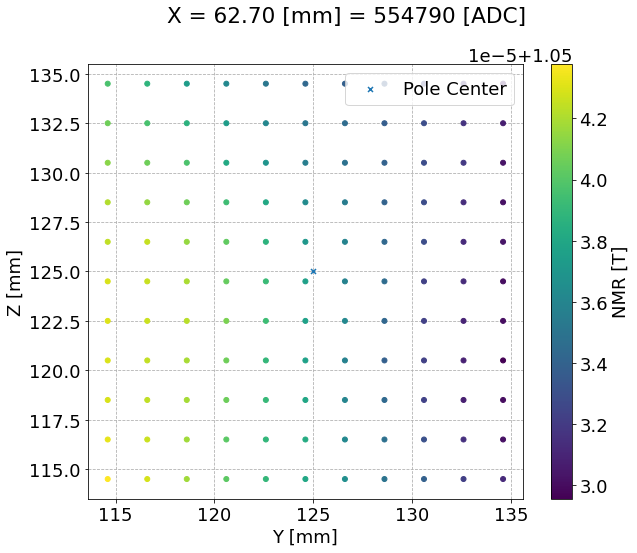

In [1100]:
for x_ in df3d_.magnet_X_mm.unique():
    fig, ax = scatter_plane(df3d_, 'X', x_, 'Y', 'Z')
    ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
    ax.set_aspect('equal')
    ax.legend();

In [1101]:
len(df_3d), len(df3d_)

(6172, 6172)

In [1102]:
#from hallprobecalib.hpcplots import scatter3d

In [1242]:
fig = scatter3d([df3d_['magnet_X_mm']], [df3d_['magnet_Y_mm']], [df3d_['magnet_Z_mm']], [df3d_['NMR [T]']], aspect_auto=False)

In [1243]:
fig = scatter3d([df3d_['magnet_X_mm']], [df3d_['magnet_Y_mm']], [df3d_['magnet_Z_mm']], [df3d_['NMR [T]']], [''], size_list=[4], aspect_auto=False, inline=False)

In [1105]:
len(df), len(df_)

(6172, 50)

In [1106]:
len(df) - len(df_)

6122

In [1107]:
df_bad = df.query('`NMR [T]` < 1.13')

In [1108]:
len(df_bad)

6172

In [1109]:
df_bad

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-17 16:28:57   6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13   6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28   6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43   6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59   6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:41:51         164917.96875              390569.0   
2021-06-16 11:43:46         164917.96875              390569.0   
2021-06-16 11:44:01         164917.96875              390569.0   
2021-06-16 11:44:15         164917.96875              390569.0   
2021-06-16 11:44:30         164917.96875              390569.0   
...                                  ...                   ...   
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:51        152566.015625             1623435.0   
2021-06-16 11:43:46        152566.015625

In [1110]:
df['Zaber_Pattern_X'].unique()

array([     0., 422190., 424842., 427494., 430146., 432798., 435450.,
       438102., 440754., 443406., 446058., 448710., 451362., 454014.,
       456666., 459318., 461970., 464622., 467274., 469926., 472578.,
       475230., 477882., 480534., 483186., 485838., 488490., 491142.,
       493794., 496446., 499098., 501750., 504402., 507054., 509706.,
       512358., 515010., 517662., 520314., 522966., 525618., 528270.,
       530922., 533574., 536226., 538878., 541530., 544182., 546834.,
       549486., 552138., 554790.])

In [1111]:
df['magnet_Y_mm'].unique()

array([114.6, 116.6, 118.6, 120.6, 122.6, 124.6, 126.6, 128.6, 130.6,
       132.6, 134.6])

In [1112]:
df['magnet_Z_mm'].unique()

array([134.5, 132.5, 130.5, 128.5, 126.5, 124.5, 122.5, 120.5, 118.5,
       116.5, 114.5])

In [1381]:
#df_line = df_.query('(magnet_Y_mm == 125.6) & (magnet_Z_mm == 125.5)')
##df_line = df3d_.query('(magnet_Y_mm == 125.6) & (magnet_Z_mm == 125.5)')
df_line = df3d_.query('(magnet_Y_mm == 124.6) & (magnet_Z_mm == 124.5)')

In [1382]:
len(df_line)

51

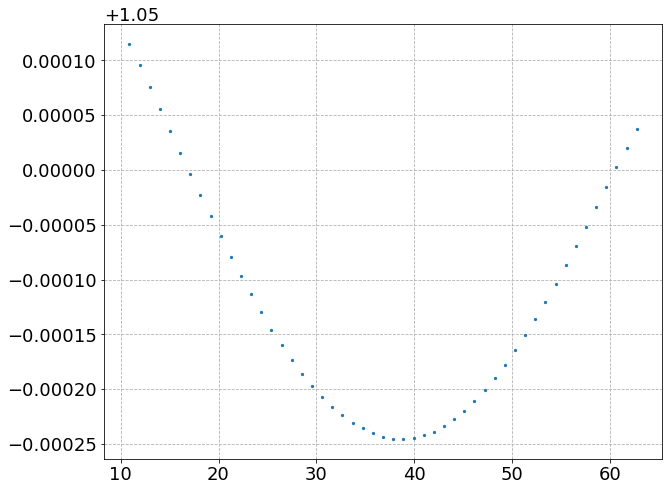

In [1383]:
fig, ax = plt.subplots()
ax.scatter(df_line['magnet_X_mm'], df_line['NMR [T]'], s=5)

In [1384]:
#df2 = load_data(ddir+'2021-06-14 104019.txt')
##df2 = load_data(ddir+'2021-06-15 073806.txt')
df2 = load_data(ddir+'2021-06-15 073806.txt')
df3 = load_data(ddir+'2021-06-16 074548.txt')
df_slow2 = load_data(ddir+'2021-06-15 073803slow.txt')
df_slow3 = load_data(ddir+'2021-06-16 074544slow.txt')

In [1410]:
#df2_ = df2.query('223 <= `Magnet Current [V]` <= 225')
#df2_ = df2.query('192 <= `Magnet Current [V]` <= 194')
df3_ = df3.query('192 <= `Magnet Current [V]` <= 194')
df2_ = df3_.loc['2021-06-16 09:00':]
df3_ = df3_.loc[:'2021-06-16 09:00']
# df3_ = df3_.loc['2021-06-16 09:00':]

In [1387]:
df3_

Time  Magnet Current [V]  \
Datetime                                                        
2021-06-16 07:45:49  6/16/2021 7:45:49 AM          192.053420   
2021-06-16 07:47:13  6/16/2021 7:47:13 AM          192.053420   
2021-06-16 07:47:34  6/16/2021 7:47:34 AM          192.053363   
2021-06-16 07:47:55  6/16/2021 7:47:55 AM          192.053307   
2021-06-16 07:48:16  6/16/2021 7:48:16 AM          192.053420   
2021-06-16 07:48:37  6/16/2021 7:48:37 AM          192.053420   
2021-06-16 07:48:58  6/16/2021 7:48:58 AM          192.053363   
2021-06-16 07:49:20  6/16/2021 7:49:20 AM          192.053137   
2021-06-16 07:49:41  6/16/2021 7:49:41 AM          192.053363   
2021-06-16 07:50:02  6/16/2021 7:50:02 AM          192.053420   
2021-06-16 07:50:23  6/16/2021 7:50:23 AM          192.053250   
2021-06-16 07:50:44  6/16/2021 7:50:44 AM          192.053420   
2021-06-16 07:51:05  6/16/2021 7:51:05 AM          192.053420   
2021-06-16 07:51:27  6/16/2021 7:51:27 AM          192.053250   
2021-06-16 07:51:48  6/16/2021 7:51:48 AM          192.053420   
2021-06-16 07:52:41  6/16/2021 7:52:41 AM          192.053420   
2021-06-16 07:53:03  6/16/2021 7:53:03 AM          192.053363   
2021-06-16 07:53:24  6/16/2021 7:53:24 AM          192.053420   
2021-06-16 07:53:45  6/16/2021 7:53:45 AM          192.053420   
2021-06-16 07:54:06  6/16/2021 7:54:06 AM          192.053420   
2021-06-16 07:54:28  6/16/2021 7:54:28 AM          192.053420   
2021-06-16 07:54:49  6/16/2021 7:54:49 AM          192.053477   
2021-06-16 07:55:10  6/16/2021 7:55:10 AM          192.053420   
2021-06-16 07:55:31  6/16/2021 7:55:31 AM          192.053420   
2021-06-16 07:55:52  6/16/2021 7:55:52 AM          192.053420   
2021-06-16 07:56:14  6/16/2021 7:56:14 AM          192.053533   
2021-06-16 07:56:35  6/16/2021 7:56:35 AM          192.053533   
2021-06-16 07:56:56  6/16/2021 7:56:56 AM          192.053590   
2021-06-16 07:57:49  6/16/2021 7:57:49 AM          192.053420   
2021-06-16 07:58:10  6/16/2021 7:58:10 AM          192.053420   
2021-06-16 07:58:31  6/16/2021 7:58:31 AM          192.053420   
2021-06-16 07:58:53  6/16/2021 7:58:53 AM          192.053420   
2021-06-16 07:59:14  6/16/2021 7:59:14 AM          192.053420   
2021-06-16 07:59:36  6/16/2021 7:59:36 AM          192.053420   
2021-06-16 07:59:57  6/16/2021 7:59:57 AM          192.053420   
2021-06-16 08:00:18  6/16/2021 8:00:18 AM          192.053363   
2021-06-16 08:00:39  6/16/2021 8:00:39 AM          192.053307   
2021-06-16 08:01:01  6/16/2021 8:01:01 AM          192.053420   
2021-06-16 08:01:22  6/16/2021 8:01:22 AM          192.053363   
2021-06-16 08:01:43  6/16/2021 8:01:43 AM          192.053307   
2021-06-16 08:02:36  6/16/2021 8:02:36 AM          192.053363   
2021-06-16 08:02:57  6/16/2021 8:02:57 AM          192.053420   
2021-06-16 08:03:18  6/16/2021 8:03:18 AM          192.053420   
2021-06-16 08:03:39  6/16/2021 8:03:39 AM          192.053420   
2021-06-16 08:04:00  6/16/2021 8:04:00 AM          192.053420   
2021-06-16 08:04:21  6/16/2021 8:04:21 AM          192.053420   
2021-06-16 08:04:42  6/16/2021 8:04:42 AM          192.053363   
2021-06-16 08:05:03  6/16/2021 8:05:03 AM          192.053420   
2021-06-16 08:05:24  6/16/2021 8:05:24 AM          192.053420   
2021-06-16 08:05:45  6/16/2021 8:05:45 AM          192.053420   
2021-06-16 08:06:06  6/16/2021 8:06:06 AM          192.053420   
2021-06-16 08:06:27  6/16/2021 8:06:27 AM          192.053420   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 07:45:49           24.344133  1.050077        0.0              0.0   
2021-06-16 07:47:13           24.344017  1.050068        0.0         422190.0   
2021-06-16 07:47:34           24.343950  1.050049        0.0         424842.0   
2021-06-16 07:47:55           24.343850  1.050030        0.0         427494.0   
2021-06-16 07:48:16           24.343817 

In [1388]:
df2_

Time  Magnet Current [V]  \
Datetime                                                        
2021-06-15 14:29:28  6/15/2021 2:29:28 PM          192.053080   
2021-06-15 14:29:49  6/15/2021 2:29:49 PM          192.053023   
2021-06-15 14:30:10  6/15/2021 2:30:10 PM          192.053080   
2021-06-15 14:30:31  6/15/2021 2:30:31 PM          192.053080   
2021-06-15 14:30:52  6/15/2021 2:30:52 PM          192.053137   
2021-06-15 14:31:13  6/15/2021 2:31:13 PM          192.053080   
2021-06-15 14:31:34  6/15/2021 2:31:34 PM          192.053080   
2021-06-15 14:31:55  6/15/2021 2:31:55 PM          192.053080   
2021-06-15 14:32:16  6/15/2021 2:32:16 PM          192.053080   
2021-06-15 14:32:37  6/15/2021 2:32:37 PM          192.053080   
2021-06-15 14:32:57  6/15/2021 2:32:57 PM          192.053080   
2021-06-15 14:33:18  6/15/2021 2:33:18 PM          192.053137   
2021-06-15 14:33:39  6/15/2021 2:33:39 PM          192.053137   
2021-06-15 14:34:00  6/15/2021 2:34:00 PM          192.053193   
2021-06-15 14:34:21  6/15/2021 2:34:21 PM          192.053193   
2021-06-15 14:35:13  6/15/2021 2:35:13 PM          192.053080   
2021-06-15 14:35:34  6/15/2021 2:35:34 PM          192.053080   
2021-06-15 14:35:55  6/15/2021 2:35:55 PM          192.053080   
2021-06-15 14:36:16  6/15/2021 2:36:16 PM          192.053193   
2021-06-15 14:36:37  6/15/2021 2:36:37 PM          192.053080   
2021-06-15 14:36:58  6/15/2021 2:36:58 PM          192.053137   
2021-06-15 14:37:19  6/15/2021 2:37:19 PM          192.053250   
2021-06-15 14:37:40  6/15/2021 2:37:40 PM          192.053080   
2021-06-15 14:38:02  6/15/2021 2:38:02 PM          192.053080   
2021-06-15 14:38:23  6/15/2021 2:38:23 PM          192.053193   
2021-06-15 14:38:44  6/15/2021 2:38:44 PM          192.053080   
2021-06-15 14:39:05  6/15/2021 2:39:05 PM          192.053080   
2021-06-15 14:39:26  6/15/2021 2:39:26 PM          192.053080   
2021-06-15 14:40:19  6/15/2021 2:40:19 PM          192.053080   
2021-06-15 14:40:40  6/15/2021 2:40:40 PM          192.053080   
2021-06-15 14:41:01  6/15/2021 2:41:01 PM          192.053080   
2021-06-15 14:41:22  6/15/2021 2:41:22 PM          192.053080   
2021-06-15 14:41:43  6/15/2021 2:41:43 PM          192.053023   
2021-06-15 14:42:04  6/15/2021 2:42:04 PM          192.053023   
2021-06-15 14:42:25  6/15/2021 2:42:25 PM          192.053080   
2021-06-15 14:42:46  6/15/2021 2:42:46 PM          192.053080   
2021-06-15 14:43:08  6/15/2021 2:43:08 PM          192.053080   
2021-06-15 14:43:28  6/15/2021 2:43:28 PM          192.053080   
2021-06-15 14:43:50  6/15/2021 2:43:50 PM          192.053080   
2021-06-15 14:44:11  6/15/2021 2:44:11 PM          192.053080   
2021-06-15 14:45:03  6/15/2021 2:45:03 PM          192.053080   
2021-06-15 14:45:24  6/15/2021 2:45:24 PM          192.053080   
2021-06-15 14:45:45  6/15/2021 2:45:45 PM          192.053080   
2021-06-15 14:46:06  6/15/2021 2:46:06 PM          192.053137   
2021-06-15 14:46:27  6/15/2021 2:46:27 PM          192.053137   
2021-06-15 14:46:48  6/15/2021 2:46:48 PM          192.053080   
2021-06-15 14:47:09  6/15/2021 2:47:09 PM          192.053080   
2021-06-15 14:47:30  6/15/2021 2:47:30 PM          192.053137   
2021-06-15 14:47:51  6/15/2021 2:47:51 PM          192.053080   
2021-06-15 14:48:12  6/15/2021 2:48:12 PM          192.053080   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-15 14:29:28           24.342450  1.050094        0.0         424842.0   
2021-06-15 14:29:49           24.342700  1.050075        0.0         427494.0   
2021-06-15 14:30:10           24.342950  1.050056        0.0         430146.0   
2021-06-15 14:30:31           24.343233  1.050037        0.0         432798.0   
2021-06-15 14:30:52           24.343533  1.050019        0.0         435450.0   
2021-06-15 14:31:13           24.343733  1.050000        0.0         438102.0   
2021-06-

In [1389]:
37.5 + 20., 37.5 - 20.

(57.5, 17.5)

In [1390]:
37.8 + 20., 37.8 - 20.

(57.8, 17.799999999999997)

In [1391]:
y0 = df2_.magnet_Y_mm.iloc[1]
z0 = df2_.magnet_Z_mm.iloc[1]

In [1392]:
y0, z0

(124.6, 124.5)

In [1393]:
df.index[-1]-df.index[0]

Timedelta('1 days 04:48:08')

In [1394]:
df_line["NMR [T]"].mean()

1.0498791918431374

In [1395]:
mid = df_line["NMR [T]"].mean()

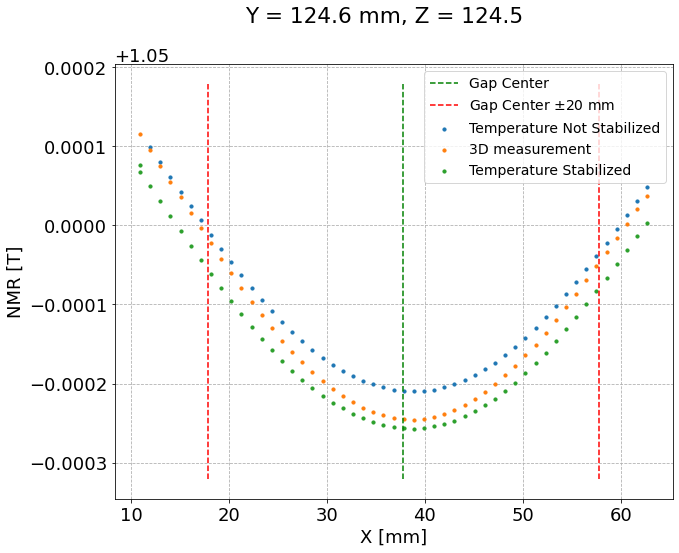

In [1411]:
fig, ax = plt.subplots()
ax.scatter(df2_['magnet_X_mm'], df2_['NMR [T]'], s=10, label='Temperature Not Stabilized')
ax.scatter(df_line['magnet_X_mm'], df_line['NMR [T]'], s=10, label='3D measurement')
ax.scatter(df3_['magnet_X_mm'], df3_['NMR [T]'], s=10, label='Temperature Stabilized')
#ax.plot([37.8, 37.8], [1.16-4e-4, 1.16+4.5e-4], 'g--', label='Gap Center')
#ax.plot([17.8, 17.8], [1.16-4e-4, 1.16+4.5e-4], 'r--', label=r'Gap Center $\pm 20$ mm')
#ax.plot([57.8, 57.8], [1.16-4e-4, 1.16+4.5e-4], 'r--')
pm = 2e-4
ax.plot([37.8, 37.8], [mid-pm, mid+pm*1.5], 'g--', label='Gap Center')
ax.plot([17.8, 17.8], [mid-pm, mid+pm*1.5], 'r--', label=r'Gap Center $\pm 20$ mm')
ax.plot([57.8, 57.8], [mid-pm, mid+pm*1.5], 'r--')

ax.set_xlabel('X [mm]')
ax.set_ylabel('NMR [T]')
fig.suptitle(f'Y = {y0} mm, Z = {z0}')
ax.legend(fontsize=14, loc='best');
# fig.savefig(plotdir+'pole_to_pole_comparison.pdf', facecolor='white', transparent=False)
# fig.savefig(plotdir+'pole_to_pole_comparison.png', facecolor='white', transparent=False)
fig.savefig('pole_to_pole_comparison.pdf', facecolor='white', transparent=False)
fig.savefig('pole_to_pole_comparison.png', facecolor='white', transparent=False)

In [1422]:
df2_.index[-1], df_line.index[0]

(Timestamp('2021-06-16 11:28:54'), Timestamp('2021-06-16 11:59:43'))

In [1397]:
df_line.index[0]

Timestamp('2021-06-16 11:59:43')

In [1398]:
df_3d.loc[df_line.index[0]]['NMR [T]']

1.050115291

In [1399]:
def find_neighbours_index(value, df):
#     exactmatch = df[df.index == value]
#     if not exactmatch.empty:
#         return exactmatch.index
#     else:
    lowerneighbour_ind = df[df.index < value].index[-1]#.idxmax()
    upperneighbour_ind = df[df.index > value].index[0]#.idxmin()
    return [lowerneighbour_ind, upperneighbour_ind] 

def interp_val(time, df, interp_col):
    xi, xf = find_neighbours_index(time, df)
    yi, yf = [df.loc[x_][interp_col] for x_ in [xi, xf]]
    return yi + (time-xi) / (xf-xi) * (yf-yi)

In [1400]:
xi, xf = find_neighbours_index(df_line.index[0], df_slow)
xi, xf

(Timestamp('2021-06-16 11:53:55'), Timestamp('2021-06-16 12:03:55'))

In [1401]:
interp_val(df_line.index[0], df_slow, 'Yoke (center magnet)')

23.749517482

In [1402]:
df_slow.loc[xi]['Yoke (center magnet)'], df_slow.loc[xf]['Yoke (center magnet)']

(23.746233, 23.7518959)

In [1403]:
[(i-df_line.index[0]).total_seconds()/60. for i in find_neighbours_index(df_line.index[0], df_slow)]

[-5.8, 4.2]

In [1404]:
df_line['Yoke (center magnet)'] = [interp_val(i, df_slow, 'Yoke (center magnet)') for i in df_line.index]
df2_['Yoke (center magnet)'] = [interp_val(i, df_slow2, 'Yoke (center magnet)') for i in df2_.index]
df3_['Yoke (center magnet)'] = [interp_val(i, df_slow3, 'Yoke (center magnet)') for i in df3_.index]

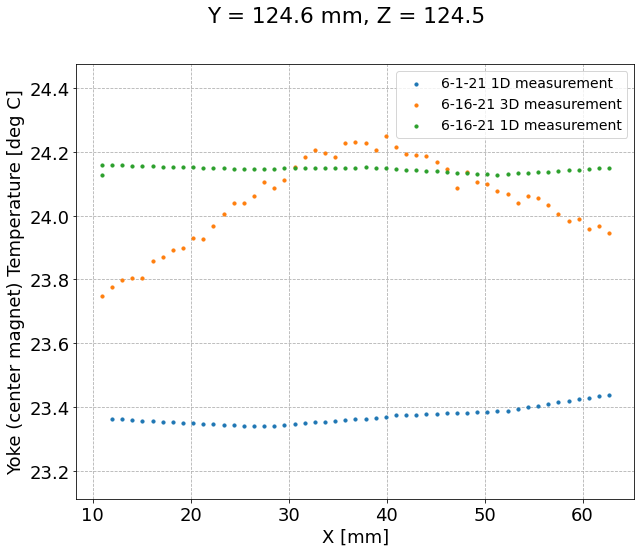

In [1405]:
fig, ax = plt.subplots()
ax.scatter(df2_['magnet_X_mm'], df2_['Yoke (center magnet)'], s=10, label='6-1-21 1D measurement')
ax.scatter(df_line['magnet_X_mm'], df_line['Yoke (center magnet)'], s=10, label='6-16-21 3D measurement')
ax.scatter(df3_['magnet_X_mm'], df3_['Yoke (center magnet)'], s=10, label='6-16-21 1D measurement')
# ax.plot([37.8, 37.8], [23, 24], 'g--', label='Gap Center')
# ax.plot([17.8, 17.8], [mid-4e-4, mid+4.5e-4], 'r--', label=r'Gap Center $\pm 20$ mm')
# ax.plot([57.8, 57.8], [mid-4e-4, mid+4.5e-4], 'r--')
all_temps = np.concatenate([_['Yoke (center magnet)'] for _ in [df_line, df2_, df3_]])
tma = np.max(all_temps)
tmi = np.min(all_temps)
tra = tma - tmi

ax.set_ylim([tmi-0.25*tra, tma+0.25*tra])

ax.set_xlabel('X [mm]')
ax.set_ylabel('Yoke (center magnet) Temperature [deg C]')
fig.suptitle(f'Y = {y0} mm, Z = {z0}')
ax.legend(fontsize=14, loc='best');
fig.savefig('pole_to_pole_temp_comparison.pdf', facecolor='white', transparent=False)
fig.savefig('pole_to_pole_temp_comparison.png', facecolor='white', transparent=False)

In [1408]:
B_on_T = -6e-5 # Tesla / deg
#B_corr = B_on_T * (df_line['Yoke (center magnet)']-df2_['Yoke (center magnet)'].iloc[-1])
B_corr = B_on_T * (df_line['Yoke (center magnet)']-df3_['Yoke (center magnet)'].iloc[-1])
df_line['NMR_corr'] = df_line['NMR [T]'] - B_corr

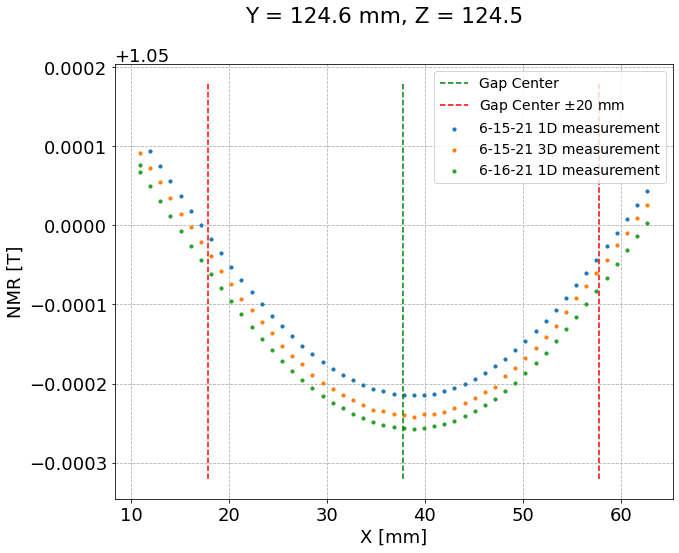

In [1409]:
fig, ax = plt.subplots()
ax.scatter(df2_['magnet_X_mm'], df2_['NMR [T]'], s=10, label='6-15-21 1D measurement')
ax.scatter(df_line['magnet_X_mm'], df_line['NMR_corr'], s=10, label='6-15-21 3D measurement')
ax.scatter(df3_['magnet_X_mm'], df3_['NMR [T]'], s=10, label='6-16-21 1D measurement')
#ax.plot([37.8, 37.8], [1.16-4e-4, 1.16+4.5e-4], 'g--', label='Gap Center')
#ax.plot([17.8, 17.8], [1.16-4e-4, 1.16+4.5e-4], 'r--', label=r'Gap Center $\pm 20$ mm')
#ax.plot([57.8, 57.8], [1.16-4e-4, 1.16+4.5e-4], 'r--')

pm = 2e-4
ax.plot([37.8, 37.8], [mid-pm, mid+pm*1.5], 'g--', label='Gap Center')
ax.plot([17.8, 17.8], [mid-pm, mid+pm*1.5], 'r--', label=r'Gap Center $\pm 20$ mm')
ax.plot([57.8, 57.8], [mid-pm, mid+pm*1.5], 'r--')


ax.set_xlabel('X [mm]')
ax.set_ylabel('NMR [T]')
fig.suptitle(f'Y = {y0} mm, Z = {z0}')
ax.legend(fontsize=14, loc='best');
fig.savefig('temp_corrected_pole_to_pole_comparison.pdf', facecolor='white', transparent=False)
fig.savefig('temp_corrected_pole_to_pole_comparison.png', facecolor='white', transparent=False)

In [1283]:
B_corr

Datetime
2021-06-15 14:59:37   -0.000002
2021-06-15 15:10:17   -0.000005
2021-06-15 15:20:56   -0.000008
2021-06-15 15:31:35   -0.000009
2021-06-15 15:42:15   -0.000011
2021-06-15 15:52:58   -0.000015
2021-06-15 16:04:10   -0.000013
2021-06-15 16:14:51   -0.000017
2021-06-15 16:25:31   -0.000020
2021-06-15 16:36:11   -0.000020
2021-06-15 16:46:50   -0.000021
2021-06-15 16:57:30   -0.000024
2021-06-15 17:08:13   -0.000022
2021-06-15 17:19:24   -0.000024
2021-06-15 17:30:04   -0.000026
2021-06-15 17:40:44   -0.000029
2021-06-15 17:51:23   -0.000029
2021-06-15 18:02:04   -0.000031
2021-06-15 18:12:43   -0.000031
2021-06-15 18:23:22   -0.000033
2021-06-15 18:34:36   -0.000034
2021-06-15 18:45:22   -0.000035
2021-06-15 18:56:03   -0.000033
2021-06-15 19:06:39   -0.000035
2021-06-15 19:17:19   -0.000038
2021-06-15 19:27:59   -0.000037
2021-06-15 19:39:10   -0.000037
2021-06-15 19:49:50   -0.000039
2021-06-15 20:00:30   -0.000040
2021-06-15 20:11:08   -0.000041
2021-06-15 20:21:46   -0.000043

In [823]:
yc = df_slow['Yoke (center magnet)']
yc.max() - yc.min()

0.48492239999999853

In [828]:
(yc.max() - yc.min()) * 5e-5

2.424611999999993e-05

In [827]:
mc = df_3d['Magnet Current [V]']
mc.max() - mc.min()

0.0005666670000152862

In [829]:
(mc.max() - mc.min()) * 1e-3

5.666670000152862e-07

In [108]:
idx = df2_['NMR [T]'].argmin()

In [109]:
df2_.iloc[idx]

Time                    6/15/2021 7:48:47 AM
Magnet Current [V]                 224.06119
Magnet Voltage [V]                 29.201067
NMR [T]                             1.159672
NMR [FFT]                                0.0
Zaber_Pattern_X                     491142.0
Zaber_Pattern_Y                     416169.0
Zaber_Pattern_Z                    1649035.0
Zaber_Meas_Encoder_X                491142.0
Zaber_Meas_Micron_X             191852.34375
Zaber_Meas_Encoder_Y                416169.0
Zaber_Meas_Micron_Y            162566.015625
Zaber_Meas_Encoder_Z               1649035.0
Zaber_Meas_Micron_Z            644154.296875
seconds_delta                          640.0
hours_delta                         0.177778
days_delta                          0.007407
magnet_X_mm                        37.834375
magnet_Y_mm                            124.6
magnet_Z_mm                            124.5
Name: 2021-06-15 07:48:47, dtype: object

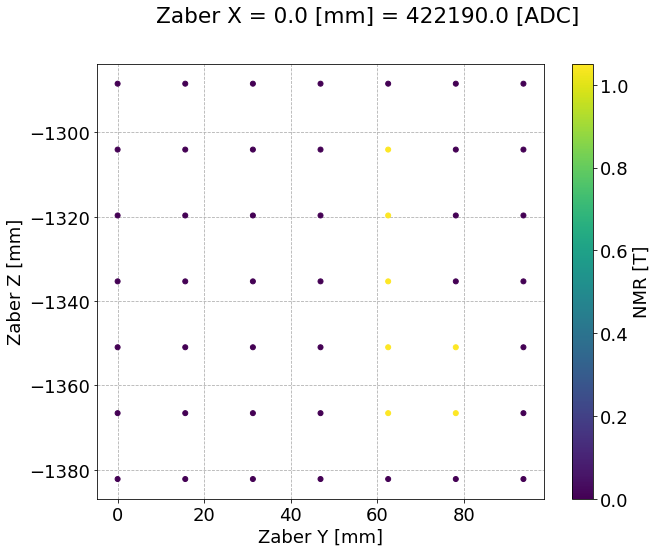

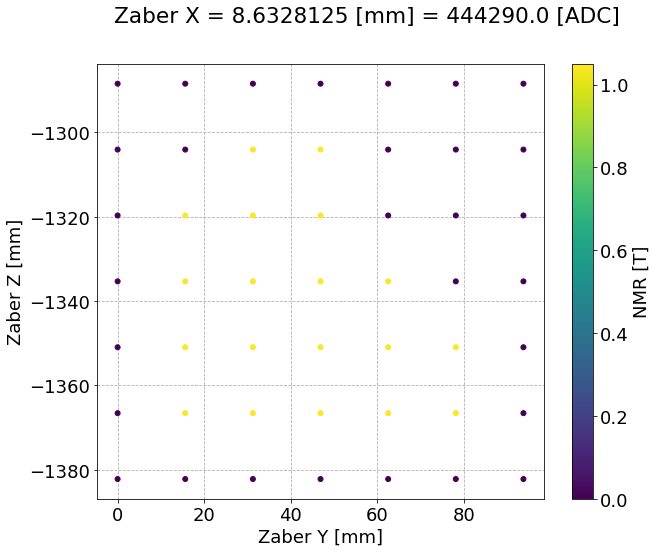

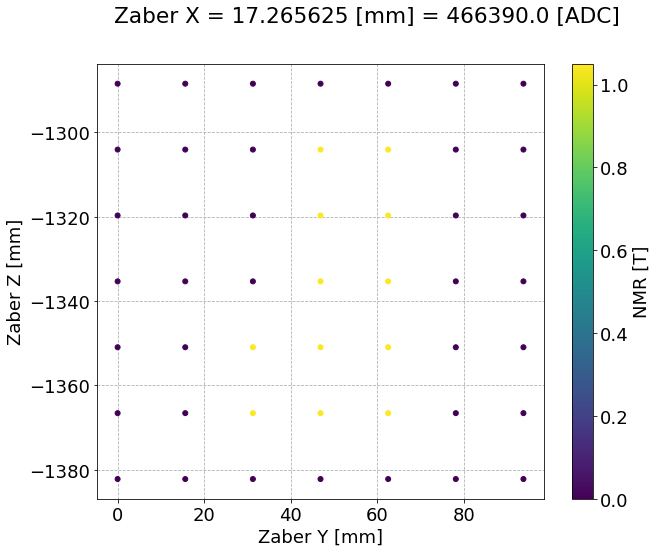

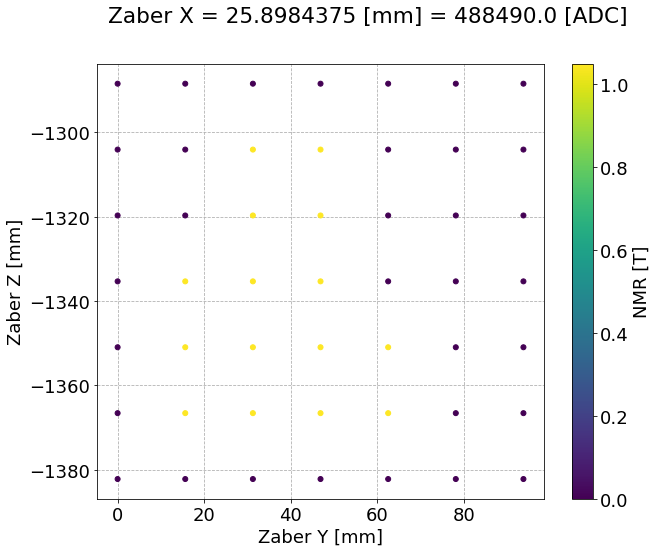

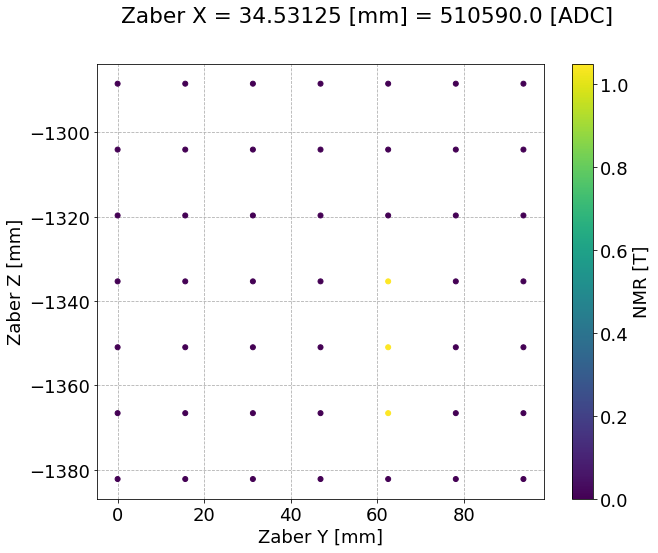

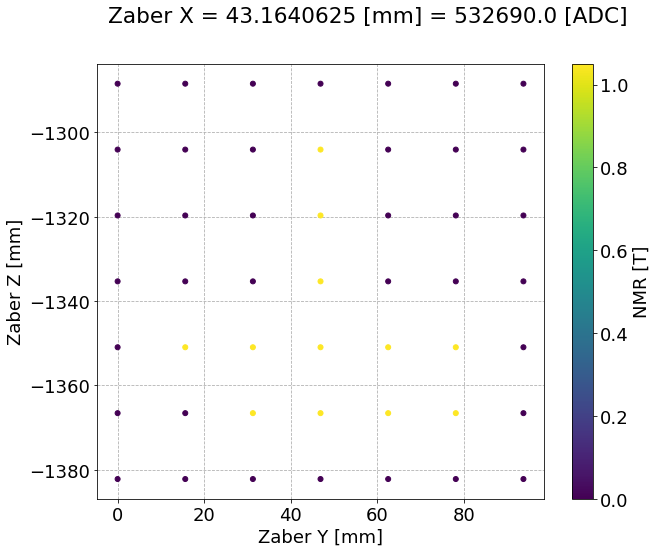

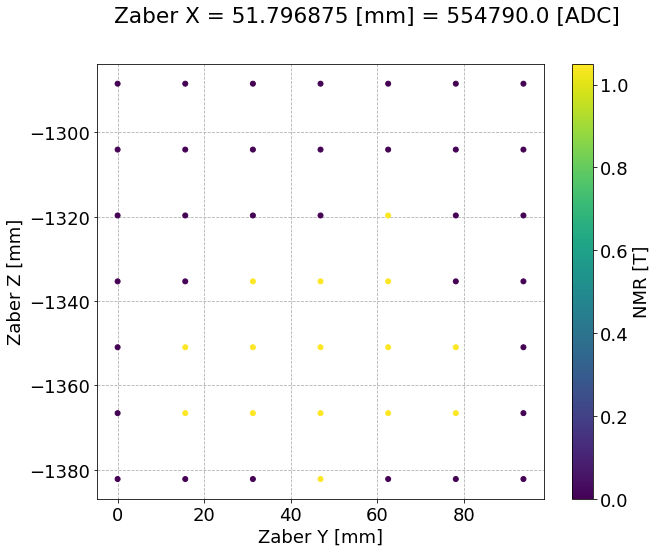

In [279]:
for xval in df['Zaber_Pattern_X'].unique():
    fig, ax = plot_xplane(df, xval, f'{plotdir_pattern}xslices/NMR_vs_Z_vs_Y_{int(xval):d}')

# 1D Data, side by side

In [136]:
# Load, Combine, Transform

In [908]:
df_6_14 = load_data(ddir+patternfile)
df_slow_6_14 = load_data(ddir+slowfile)
df_6_15 = load_data(ddir+patternfile_6_15)
df_slow_6_15 = load_data(ddir+slowfile_6_15)
df_6_16 = load_data(ddir+patternfile_6_16)
df_slow_6_16 = load_data(ddir+slowfile_6_16)

In [909]:
df_6_15

Time  Magnet Current [V]  \
Datetime                                                        
2021-06-15 07:38:07  6/15/2021 7:38:07 AM          224.061133   
2021-06-15 07:39:14  6/15/2021 7:39:14 AM          224.061360   
2021-06-15 07:39:35  6/15/2021 7:39:35 AM          224.061247   
2021-06-15 07:39:56  6/15/2021 7:39:56 AM          224.061303   
2021-06-15 07:40:17  6/15/2021 7:40:17 AM          224.061360   
...                                   ...                 ...   
2021-06-15 14:46:48  6/15/2021 2:46:48 PM          192.053080   
2021-06-15 14:47:09  6/15/2021 2:47:09 PM          192.053080   
2021-06-15 14:47:30  6/15/2021 2:47:30 PM          192.053137   
2021-06-15 14:47:51  6/15/2021 2:47:51 PM          192.053080   
2021-06-15 14:48:12  6/15/2021 2:48:12 PM          192.053080   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-15 07:38:07           29.205083  1.160179        0.0              0.0   
2021-06-15 07:39:14           29.204067  1.160174        0.0         422190.0   
2021-06-15 07:39:35           29.203917  1.160143        0.0         424842.0   
2021-06-15 07:39:56           29.203850  1.160112        0.0         427494.0   
2021-06-15 07:40:17           29.203833  1.160081        0.0         430146.0   
...                                 ...       ...        ...              ...   
2021-06-15 14:46:48           24.356000  1.049973        0.0         544182.0   
2021-06-15 14:47:09           24.356267  1.049991        0.0         546834.0   
2021-06-15 14:47:30           24.356533  1.050008        0.0         549486.0   
2021-06-15 14:47:51           24.356800  1.050026        0.0         552138.0   
2021-06-15 14:48:12           24.357050  1.050043        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-15 07:38:07              0.0              0.0              422190.0   
2021-06-15 07:39:14         416169.0        1649035.0              422190.0   
2021-06-15 07:39:35         416169.0        1649035.0              424842.0   
2021-06-15 07:39:56         416169.0        1649035.0              427494.0   
2021-06-15 07:40:17         416169.0        1649035.0              430146.0   
...                              ...              ...                   ...   
2021-06-15 14:46:48         416169.0        1649035.0              544182.0   
2021-06-15 14:47:09         416169.0        1649035.0              546834.0   
2021-06-15 14:47:30         416169.0        1649035.0              549486.0   
2021-06-15 14:47:51         416169.0        1649035.0              552138.0   
2021-06-15 14:48:12         416169.0        1649035.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-15 07:38:07         164917.96875              403369.0   
2021-06-15 07:39:14         164917.96875              416169.0   
2021-06-15 07:39:35         165953.90625              416169.0   
2021-06-15 07:39:56         166989.84375              416169.0   
2021-06-15 07:40:17         168025.78125              416169.0   
...                                  ...                   ...   
2021-06-15 14:46:48         212571.09375              416169.0   
2021-06-15 14:47:09         213607.03125              416169.0   
2021-06-15 14:47:30         214642.96875              416169.0   
2021-06-15 14:47:51         215678.90625              416169.0   
2021-06-15 14:48:12         216714.84375              416169.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-15 07:38:07        157566.015625             1636235.0   
2021-06-15 07:39:14        162566.015625            

In [910]:
df_6_16

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 07:45:49   6/16/2021 7:45:49 AM          192.053420   
2021-06-16 07:47:13   6/16/2021 7:47:13 AM          192.053420   
2021-06-16 07:47:34   6/16/2021 7:47:34 AM          192.053363   
2021-06-16 07:47:55   6/16/2021 7:47:55 AM          192.053307   
2021-06-16 07:48:16   6/16/2021 7:48:16 AM          192.053420   
...                                    ...                 ...   
2021-06-16 11:27:30  6/16/2021 11:27:30 AM          192.053420   
2021-06-16 11:27:51  6/16/2021 11:27:51 AM          192.053477   
2021-06-16 11:28:12  6/16/2021 11:28:12 AM          192.053590   
2021-06-16 11:28:33  6/16/2021 11:28:33 AM          192.053420   
2021-06-16 11:28:54  6/16/2021 11:28:54 AM          192.053477   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 07:45:49           24.344133  1.050077        0.0              0.0   
2021-06-16 07:47:13           24.344017  1.050068        0.0         422190.0   
2021-06-16 07:47:34           24.343950  1.050049        0.0         424842.0   
2021-06-16 07:47:55           24.343850  1.050030        0.0         427494.0   
2021-06-16 07:48:16           24.343817  1.050012        0.0         430146.0   
...                                 ...       ...        ...              ...   
2021-06-16 11:27:30           24.305517  1.049978        0.0         544182.0   
2021-06-16 11:27:51           24.305533  1.049995        0.0         546834.0   
2021-06-16 11:28:12           24.305533  1.050013        0.0         549486.0   
2021-06-16 11:28:33           24.305517  1.050031        0.0         552138.0   
2021-06-16 11:28:54           24.305517  1.050048        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 07:45:49              0.0              0.0              422190.0   
2021-06-16 07:47:13         416169.0        1649035.0              422190.0   
2021-06-16 07:47:34         416169.0        1649035.0              424842.0   
2021-06-16 07:47:55         416169.0        1649035.0              427494.0   
2021-06-16 07:48:16         416169.0        1649035.0              430146.0   
...                              ...              ...                   ...   
2021-06-16 11:27:30         416169.0        1649035.0              544182.0   
2021-06-16 11:27:51         416169.0        1649035.0              546834.0   
2021-06-16 11:28:12         416169.0        1649035.0              549486.0   
2021-06-16 11:28:33         416169.0        1649035.0              552138.0   
2021-06-16 11:28:54         416169.0        1649035.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 07:45:49         164917.96875              416169.0   
2021-06-16 07:47:13         164917.96875              416169.0   
2021-06-16 07:47:34         165953.90625              416169.0   
2021-06-16 07:47:55         166989.84375              416169.0   
2021-06-16 07:48:16         168025.78125              416169.0   
...                                  ...                   ...   
2021-06-16 11:27:30         212571.09375              416169.0   
2021-06-16 11:27:51         213607.03125              416169.0   
2021-06-16 11:28:12         214642.96875              416169.0   
2021-06-16 11:28:33         215678.90625              416169.0   
2021-06-16 11:28:54         216714.84375              416169.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 07:45:49        162566.015625             1649035.0   
2021-06-16 07:47:13        162566.015625

In [911]:
# currents_6_14 = [224.]
# currents_6_15 = np.array([224., 128., 144., 160., 176.])
##currents_6_15 = np.array([128., 144., 160., 176., 224.])
currents_6_15 = np.array([128., 144., 160., 176., 192., 224.])
# currents_6_15 = np.array([224., 128., 144., 160., 176., 192.])
currents_6_16 = np.array([192., 208.])

In [921]:
df_[df_.index == '2021-06-16 10:01:02']

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 10:01:02  6/16/2021 10:01:02 AM           208.05739   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 10:01:02           26.595233  1.108116        0.0         491142.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 10:01:02         416169.0        1649035.0              491142.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 10:01:02         191852.34375              416169.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 10:01:02        162566.015625             1649035.0   

                     Zaber_Meas_Micron_Z  seconds_delta  hours_delta  \
Datetime                                                               
2021-06-16 10:01:02        644154.296875         8113.0     2.253611   

                     days_delta  magnet_X_mm  magnet_Y_mm  magnet_Z_mm  
Datetime                                                                
2021-06-16 10:01:02      0.0939    37.834375        124.6        124.5

In [926]:
dI = 3.
B_fracs = []
B_vals = []
x_mms = []
for I in currents_6_15:
    df_ = df_6_15.query(f'{I-dI} < `Magnet Current [V]` < {I+dI}').copy() # fix label [V] to [A]
    nmr_m = df_['NMR [T]'].mean()
    dnmr = 5e-3
    df_ = df_.query(f'abs(`NMR [T]`-{nmr_m}) > - {dnmr}').copy()
    B_frac_ = (df_['NMR [T]'] / df_.iloc[0]['NMR [T]']).values
#     B_frac = (df_['NMR [T]'] / df_[df_.index == '2021-06-16 10:01:02']['NMR [T]'])
    B_val_ = df_['NMR [T]']
    x_mm_ = df_['magnet_X_mm'].values
    B_fracs.append(B_frac_)
    B_vals.append(B_val_)
    x_mms.append(x_mm_)

In [927]:
dI = 3.
B_fracs2 = []
B_vals2 = []
x_mms2 = []
for I in currents_6_16:
    df_ = df_6_16.query(f'{I-dI} < `Magnet Current [V]` < {I+dI}').copy() # fix label [V] to [A]
    nmr_m = df_['NMR [T]'].mean()
    dnmr = 5e-3
    df_ = df_.query(f'abs(`NMR [T]`-{nmr_m}) > - {dnmr}').copy()
    B_frac_ = (df_['NMR [T]'] / df_.iloc[0]['NMR [T]']).values
#     B_frac = (df_['NMR [T]'] / df_[df_.index == '2021-06-16 10:01:02']['NMR [T]'])
    B_val_ = df_['NMR [T]']
    x_mm_ = df_['magnet_X_mm'].values
    B_fracs2.append(B_frac_)
    B_vals2.append(B_val_)
    x_mms2.append(x_mm_)

In [928]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

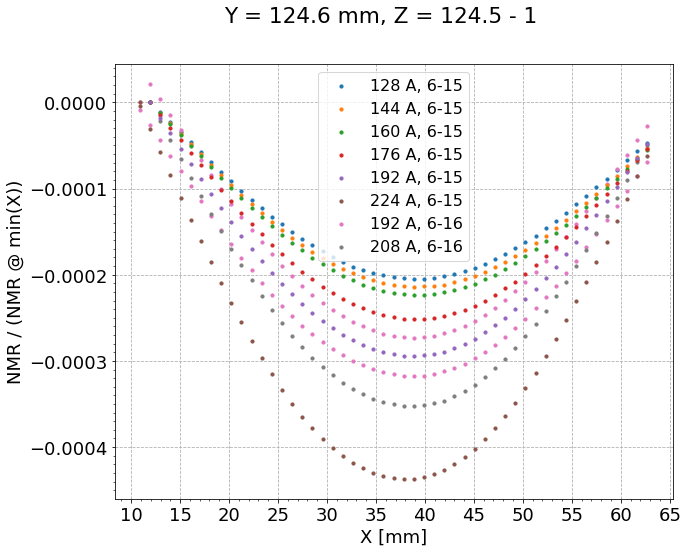

In [1423]:
fig, ax = plt.subplots()
for index, _ in enumerate(zip(currents_6_15, B_fracs, x_mms)):
    I, B, x = _
    ax.scatter(x, B-1, s=10, zorder=index+10, label=f'{int(I):d} A, 6-15')
    
for index, _ in enumerate(zip(currents_6_16, B_fracs2, x_mms2)):
    I, B, x = _
    ax.scatter(x, B-1, s=10, zorder=index+10, label=f'{int(I):d} A, 6-16')

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1e-5))
ax.set_xlabel('X [mm]')
ax.set_ylabel('NMR / (NMR @ min(X))')
fig.suptitle(f'Y = {y0} mm, Z = {z0} - 1 ')
ax.legend(fontsize=16, loc='best').set_zorder(100);

In [160]:
[np.max(B) for B in B_fracs]

[1.0, 1.0, 1.0, 1.0, 1.0]

In [161]:
[np.min(B) for B in B_fracs]

[0.9995629528512809,
 0.9997951203103804,
 0.999786199785313,
 0.9997768410023578,
 0.9997483732715875]

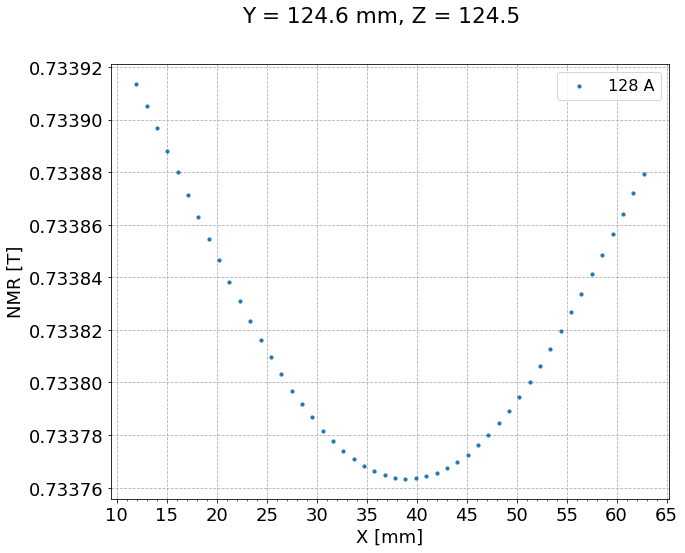

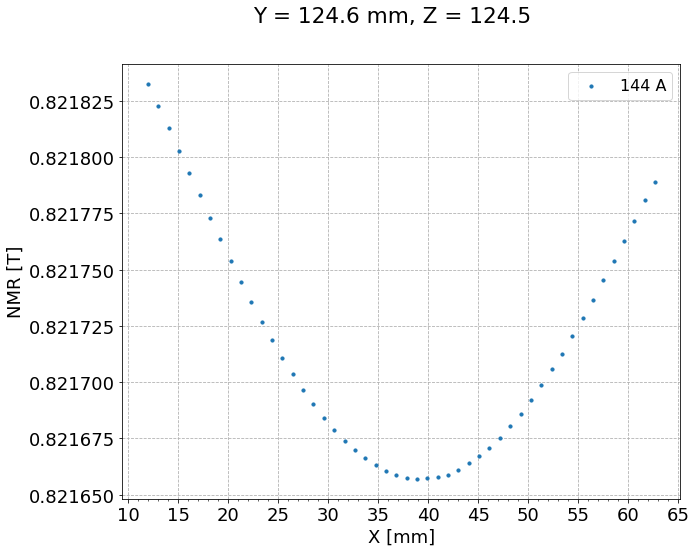

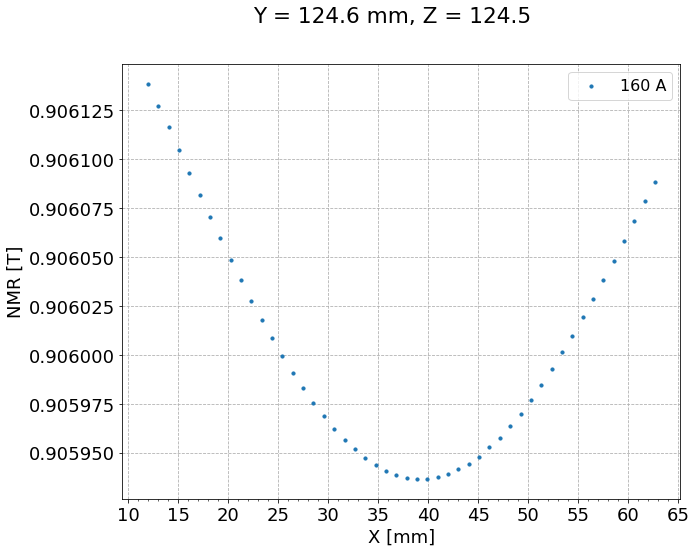

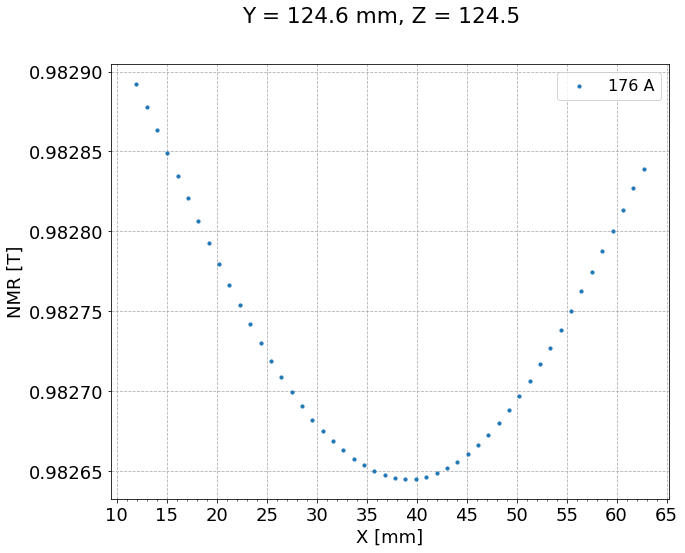

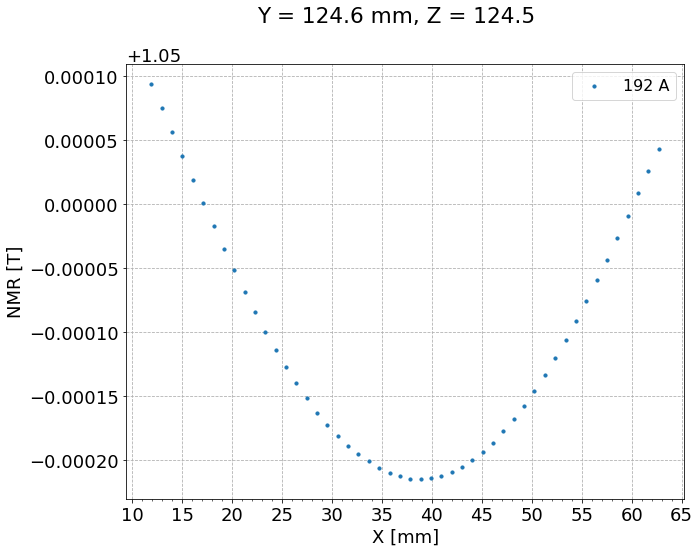

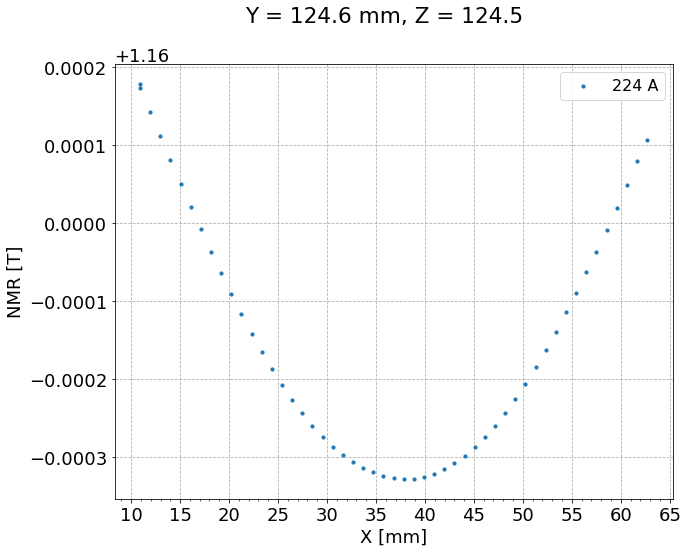

In [337]:
for index, _ in enumerate(zip(currents_6_15, B_vals, x_mms)):
    I, B, x = _
    fig, ax = plt.subplots()
    ax.scatter(x, B, s=10, zorder=index+10, label=f'{int(I):d} A')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
#     ax.yaxis.set_minor_locator(MultipleLocator(1e-5))
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('NMR [T]')
    fig.suptitle(f'Y = {y0} mm, Z = {z0}')
    ax.legend(fontsize=16, loc='best').set_zorder(100);